# Assignment 1
Authors:

1. **Chysovergis Konstantinos** 

2. **Kotsovilis Yiannos** 

3. **Voulgari Despoina** 

Subject: **Machine Learning**  

Mails: kon.chrysov@gmail.com, i.kotsovilis@gmail.com, dvoulgari@outlook.com

Professor: **S. Perantonis**

# Problem 1

In [24]:
# Import necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

## Utilities

In [ ]:
DEFAULT_NOISE_VARIANCE = 0.05

def generate_points(noise_variance=DEFAULT_NOISE_VARIANCE, N=20, seed=None):
    """
    Generates data for a certain true function with a specified random seed.

    Parameters:
        noise_variance (float): Variance of the Gaussian noise added to the true data.
        N (int): Number of data points to generate. Defaults to 20.
        seed (int): Seed for the random number generator. If None, a random seed is used.
                    Defaults to None.

    Returns:
        tuple:
            - List of (x, y_observed) tuples representing the noisy data.
            - List of (x, y_true) tuples representing the true (noise-free) data.
    """
    rng = np.random.default_rng(seed)

    x_data = np.linspace(0, 2, N)

    # Compute the true y values based on the generating function: f(x) = 0.2 - x + 0.9x^2 + 0.7x^3 - 0.2x^5
    y_true = 0.2 - x_data + 0.9*x_data**2 + 0.7*x_data**3 - 0.2*x_data**5

    y_observed = y_true + rng.normal(0, np.sqrt(noise_variance), len(x_data))

    noisy_data = list(zip(x_data, y_observed))
    true_data = list(zip(x_data, y_true))

    return noisy_data, true_data

## Model Implementations

In [ ]:
class PolynomialRegression:
    def __init__(self, training_set, degree=5, exponents=None):
        """
        Initializes the polynomial regression model for a 5th degree polynomial.

        Parameters:
            training_set (list): List of (x, y) tuples representing the training data.
            degree (int, optional): Degree of the polynomial to fit. Defaults to 5.
            exponents (list, optional): List of custom exponents for the polynomial basis.
                                         If provided, this overrides the `degree` parameter.
        """
        self.training_set = training_set
        # Separate the training set into x and y components
        self.x_values, self.y_values = zip(*training_set)
        self.degree = degree
        self.exponents = exponents
        # Parameter vector [theta_0, theta_1, theta_2, theta_3, theta_5].
        self.theta = None

    def fit(self):
        """
        Trains a polynomial regression model using the Least Squares method.

        Returns:
            np.ndarray: Estimated parameter vector [theta_0, theta_1, ..., theta_n].
        """

        # Determine the basis for the polynomial
        if self.exponents is not None:
            # Use the custom exponents
            X = np.array([[x**exp for exp in self.exponents] for x in self.x_values])
        elif self.degree is not None:
            # Use a standard polynomial basis up to `degree`
            X = np.array([[x**d for d in range(self.degree + 1)] for x in self.x_values])
        else:
            raise ValueError("Either 'degree' or 'exponents' must be specified.")

        # Prepare the output vector y
        y = np.array(self.y_values)

        # Compute theta parameter using the equation: (X^T X)^(-1) X^T y
        XtX = X.T @ X  # X^T * X
        Xty = X.T @ y  # X^T * y
        self.theta = np.linalg.inv(XtX) @ Xty  # (X^T X)^(-1) X^T y

        return self.theta

    def predict(self, x):
        """
        Predict y values using the estimated parameters.

        Parameters:
            x (np.ndarray): Input x values.

        Returns:
            np.ndarray: Predicted y values.
        """
        if self.theta is None:
            raise ValueError("Model is not trained yet. Call 'fit' before predicting.")

        X = np.column_stack((
            np.ones_like(x),
            x,
            x**2,
            x**3,
            x**5
        ))

        return X @ self.theta

    def plot(self, x_test, y_pred, y_true):
        """
        Plot the training data, true model, and predicted values.
        """
        plt.scatter(self.x_values, self.y_values, label="Train set", color="blue")
        plt.plot(x_test, y_pred, label="Predicted y (Test Set)", color="red", linewidth=2)
        plt.plot(self.x_values, y_true, label='True Model', color='black',  linewidth=2)

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Estimated vs True Model')
        plt.show()

In [ ]:
NUM_EXPERIMENTS = 100

class PolynomialRegressionExperiments:
    def __init__(self, polynomial_degree, num_experiments=NUM_EXPERIMENTS):
        """
        Initializes running experiments with polynomial regression for a specified degree.

        Parameters:
            polynomial_degree (int): The degree of the polynomial to be used in training.
            num_experiments (int): The number of experiments to run. Default is 10.
        """
        self.polynomial_degree = polynomial_degree
        self.num_experiments = num_experiments

    def run_experiments(self, x_test):
        """
        Runs multiple experiments to generate predicted values for a given polynomial degree.

        Returns:
            np.ndarray: A 2D array of predicted values from all experiments.
        """
        predicted_values_list = []
        for _ in range(self.num_experiments):
            # Generate training data
            training_data, _ = generate_points()
            # Initialize our model
            model = PolynomialRegression(training_data, degree = self.polynomial_degree)
            # Find theta parameters using Least Squares method
            theta_estimated = model.fit()
            # Predict y values for the test set
            predicted_values = np.polyval(theta_estimated[::-1], np.array(x_test))
            predicted_values_list.append(predicted_values)

        return np.array(predicted_values_list)

    def plot(self, x_test, y_mean_pred_second, var_pred_second, y_mean_pred_tenth, var_pred_tenth, y_true):
        """
        Plot the true model, mean predictions and variances for 2nd and 10th degree.
        """
        # Plot results for true function
        plt.plot(x_test, y_true, label='True Model', color='black', linewidth=2)

        # Plot results for 2nd-degree polynomial
        plt.plot(x_test, y_mean_pred_second, label='2nd-degree Mean Prediction', color='red', linestyle='--', linewidth=2)
        plt.fill_between(x_test, y_mean_pred_second - np.sqrt(var_pred_second), y_mean_pred_second + np.sqrt(var_pred_second),
                         color='red', alpha=0.2, label='2nd-degree Variance')

        # Plot results for 10th-degree polynomial
        plt.plot(x_test, y_mean_pred_tenth, label='10th-degree Mean Prediction', color='blue', linestyle='--', linewidth=2)
        plt.fill_between(x_test, y_mean_pred_tenth - np.sqrt(var_pred_tenth), y_mean_pred_tenth + np.sqrt(var_pred_tenth),
                         color='blue', alpha=0.2, label='10th-degree Variance')

        # Add labels and legend
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Mean and Variance of Predictions (2nd vs 10th Degree Polynomial)')
        plt.legend()
        plt.show()

In [ ]:
class FullBayesianInference:
    def __init__(self, training_set, test_set, prior_mean, prior_cov, noise_variance):
        """
        Parameters:
            training_set (list): List of (x, y) tuples representing the training data.
            test_set (list): List of (x, y) tuples representing the test data.
            prior_mean (np.ndarray): Prior mean of the parameter vector.
            prior_cov (np.ndarray): Prior covariance matrix of the parameter vector.
            noise_variance (float): Variance of the noise.
        """
        self.training_set = training_set
        self.test_set = test_set
        self.prior_mean = prior_mean
        self.prior_cov = prior_cov
        self.noise_variance = noise_variance

    def train(self):
        """
        Perform Full Bayesian Inference to estimate y for a test set.

        Returns:
            np.ndarray: Predicted y values for the test set.
        """
        # Prepare the design matrix X and output vector y for training data
        X_train = np.array([[1, x, x**2, x**3, x**5] for x, _ in self.training_set])
        y_train = np.array([y_obs for _, y_obs in self.training_set])

        # Compute posterior covariance matrix
        noise_cov = np.eye(X_train.shape[0]) * self.noise_variance
        posterior_cov = np.linalg.inv(
            np.linalg.inv(self.prior_cov) + (X_train.T @ X_train) / self.noise_variance
        )

        # Compute posterior mean
        posterior_mean = posterior_cov @ (
            np.linalg.inv(self.prior_cov) @ self.prior_mean + (X_train.T @ y_train) / self.noise_variance
        )

        # Prepare the design matrix X for the test set
        X_test = np.array([[1, x, x**2, x**3, x**5] for x, _ in self.test_set])

        # Predict y values for the test set using the posterior mean
        y_pred = X_test @ posterior_mean

        # Compute predictive variance
        predictive_variance = np.sum((X_test @ posterior_cov) * X_test, axis=1)  # Diagonal of the variance matrix

        return y_pred, posterior_mean, posterior_cov, predictive_variance

    def plot(self, posterior_mean, y_var, y_pred):
        """
        Plot the true values, predicted curve, and confidence intervals.

        Parameters:
            posterior_mean (np.ndarray): Posterior mean of the parameter vector.
                                         Represents the estimated coefficients for the model.
            y_var (np.ndarray): Predictive variance for the test set.
                                Indicates the uncertainty in the model's predictions for each test point.
            y_pred (np.ndarray): Predicted values for the test set based on the posterior mean.
        """
        # Extract x and y values from the test set
        x_test, y_test = zip(*self.test_set)

        y_std = np.sqrt(y_var)  # Standard deviation of predictions

        # Plot the true curve and the estimated values
        plt.plot(x_test, [
                posterior_mean[0] + posterior_mean[1] * x + posterior_mean[2] * x**2 + posterior_mean[3] * x**3 + posterior_mean[4] * x**5
                for x in sorted(x_test)
            ], color='red', label='Estimated Curve', linewidth=2, zorder=3)
        plt.scatter(x_test, y_test, color='blue', label='Test Set', zorder=2)
        plt.errorbar(x_test, y_test, yerr = 1.96 * y_std, fmt ='o', capsize = 4, label = "Error (95% confidence interval)", zorder=1)

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Estimated Curve')
        plt.show()

In [ ]:
DEFAULT_TOLERANCE = 1e-6

class ExpectationMaximization:
    def __init__(self, x_train, y_train, init_alpha, init_beta, tol=DEFAULT_TOLERANCE):
        """
        Parameters:
            x_train: Training input values.
            y_train: Training output values (noisy).
            init_alpha: Initial precision (1/sigma_theta^2) of parameters.
            init_beta: Initial precision (1/sigma_eta^2) of noise.
            tol: Convergence tolerance for alpha and beta updates.
        """
        self.x_train = x_train
        self.y_train = y_train
        self.init_alpha = init_alpha
        self.init_beta = init_beta
        self.tol = tol

    def train(self):
        """
        EM algorithm to estimate the noise variance (sigma_eta^2) and parameter variance (sigma_theta^2).

        Returns:
            alpha: Final precision of parameters.
            beta: Final precision of noise.
            mu_theta: Posterior mean of the parameters.
            sigma_theta: Posterior covariance of the parameters.
            iterations: Number of iterations until convergence.
        """
        # Initialize alpha and beta
        alpha = self.init_alpha # a^(0)
        beta = self.init_beta # b^(0)

        # Build the design matrix
        X = np.array([[1, x_i, x_i**2, x_i**3, x_i**5] for x_i in self.x_train]) # design matrix Φ

        N, K = X.shape # N: number of data points, K: number of parameters/dimensions

        iteration = 0
        # Initialize the difference for convergence
        delta_alpha = self.tol + 1
        delta_beta = self.tol + 1

        while delta_alpha > self.tol and delta_beta > self.tol:
            # -------------------------------
            # E-Step: Compute posterior mean and covariance
            # -------------------------------
            sigma_theta = np.linalg.inv(alpha * np.eye(K) + beta * X.T @ X)  # (a^(j)I + b^(j)Φ^TΦ)^(-1) (Posterior covariance of parameters)
            mu_theta = beta * sigma_theta @ X.T @ self.y_train  # Σ_theta|y b^(j) Φ^T y (Posterior mean of parameters)

            A = np.sum(mu_theta**2) + np.trace(sigma_theta)  # A^(j) = ||μ_theta|y||^2 + trace{Σ_theta|y}

            residuals = self.y_train - X @ mu_theta # y - Φμ_theta|y
            B = np.sum(residuals**2) + np.trace(X @ sigma_theta @ X.T)  # B^(j) = ||y - Φμ_theta|y||^2 + trace{ΦΣ_theta|yΦ^T}

            # -------------------------------
            # M-Step: Update alpha and beta
            # -------------------------------
            new_alpha = K / A # a^(j+1) = K / A^(j)
            new_beta = N / B # b^(j+1) = = N / B^(j)

            # Convergence check
            delta_alpha = np.abs(new_alpha - alpha)
            delta_beta = np.abs(new_beta - beta)

            # Update alpha, beta, and iteration count
            alpha, beta = new_alpha, new_beta
            iteration += 1

        # Final E-step to compute the posterior parameters
        sigma_theta = np.linalg.inv(alpha * np.eye(K) + beta * X.T @ X)
        mu_theta = beta * sigma_theta @ X.T @ self.y_train

        return alpha, beta, mu_theta, sigma_theta, iteration

    def plot(self, x_test, y_test, y_true, y_pred, y_std):
        """
        Plot the true function, test data, predicted curve, and confidence intervals.

        Parameters:
            x_test (np.ndarray): Input values for the test set.
            y_test (np.ndarray): Observed (noisy) output values for the test set.
            y_true (np.ndarray): True output values based on the true function.
            y_pred (np.ndarray): Predicted output values based on the EM model.
            y_std (np.ndarray): Standard deviation of the predictions, used to plot confidence intervals.
        """
        plt.figure(figsize=(8, 6))
        plt.scatter(x_test, y_test, color='blue', alpha=0.5, label='Test Data', zorder=2)
        plt.plot(x_test, y_true, color='black', label='True Model', linewidth=2)
        plt.plot(x_test, y_pred, color='red', label='Estimated Curve', linewidth=2)

        plt.errorbar(x_test, y_test, yerr = 1.96 * y_std, fmt ='o', capsize = 5, label = "Error (95% confidence interval)", zorder=1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title('Estimated Curve with EM')
        plt.show()

In [ ]:
class ParzenWindowEstimation:
    def __init__(self, x_test, noisy_data, h):
        """
        Parameters:
            x_test (np.ndarray): Test x values for which to estimate y.
            noisy_data (list): List of (x, y_observed) tuples from the training data.
            h (float): Bandwidth for the Parzen window kernel.
        """
        self.x_test = x_test
        self.noisy_data = noisy_data
        self.h = h

    def estimate(self):
        """
        Estimate y using Parzen window regression.

        Returns:
            np.ndarray: Predicted y values for the test set.
        """
        x_train, y_train = zip(*self.noisy_data)
        x_train = np.array(x_train)
        y_train = np.array(y_train)

        y_pred_list = []
        for x in self.x_test:
            # Compute weights using Gaussian kernel
            weights = np.exp(-((x_train - x)**2) / (2 * self.h**2))

            # Compute weighted average of y_train
            y_pred = np.sum(weights * y_train) / np.sum(weights)
            y_pred_list.append(y_pred)

        return np.array(y_pred_list)

    def plot(self, x_test, y_test, x_train, y_train, y_pred, title, N):
        """
        Plot the results of Parzen window regression.

        Parameters:
            x_test (np.ndarray): Test x values.
            y_test (np.ndarray): True y values for the test set.
            x_train (np.ndarray): Training x values.
            y_train (np.ndarray): Observed y values for the training set.
            y_pred (np.ndarray): Predicted y values for the test set.
            title (str): Title for the plot.
            N (int): Number of data points in the training set.
        """
        # Plot the true model curve
        x_curve = np.linspace(0, 2, N)
        y_curve = 0.2 - x_curve + 0.9 * x_curve**2 + 0.7 * x_curve**3 - 0.2 * x_curve**5
        plt.plot(x_curve, y_curve, label="True Model", color="black")

        # Plot training data
        plt.scatter(x_train, y_train, label="Training Data", color="blue")

         # Plot test data predictions
        plt.plot(x_test, y_pred, label="Predicted y (Test Set)", color="red")

        plt.title(title)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()

## 1. Least Squares with a 5th Degree Polynomial (4th power equal to zero)

Estimated Parameters:
 [-0.08008891  0.19736441 -0.23350966  0.8708722  -0.16512669]


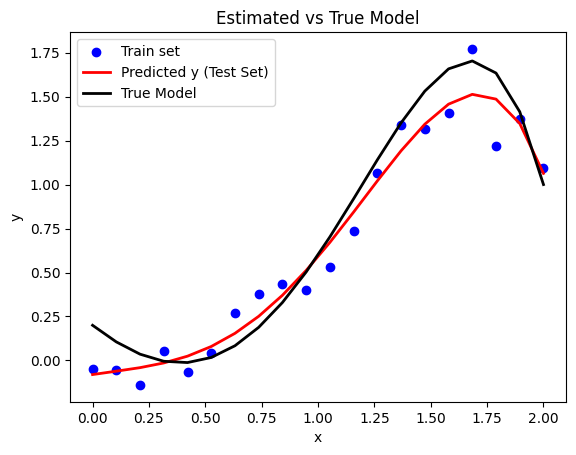

In [ ]:
# Generate training data
training_set, _ = generate_points(seed=10)
x_train, y_train = zip(*training_set)

# Generate test data
test_set, true_test_set = generate_points(seed=11)
x_test, _ = zip(*test_set)
_, y_true = zip(*true_test_set)

# Initialize our model
model = PolynomialRegression(training_set, exponents=[0, 1, 2, 3, 5])
# Calculate theta parameters using Least Squares method
theta_estimated = model.fit()
print(f"Estimated Parameters:\n {theta_estimated}")
# Predict y values for the test set using the model
y_pred = model.predict(np.array(x_test))

# Plot the true curve and the estimated values
model.plot(x_test, y_pred, y_true)

From the figure we can notice that our predictions follow the general trend of the true model, which indicates that the LS model has effectively captured the underlying true function. Since the correct polynomial structure (degree 5 with the 4th power coefficient set to zero) is used to train the model, the estimated points were expected to follow the curve of the true function, which is evident in the figure.

Some minor deviations can be observed between the red and black lines, particularly at the extremes of the x-range, which may indicate limitations due to the finite sample size.

## 2. Bias-Variance Analysis in Least Squares: 2nd vs. 10th Degree Polynomials

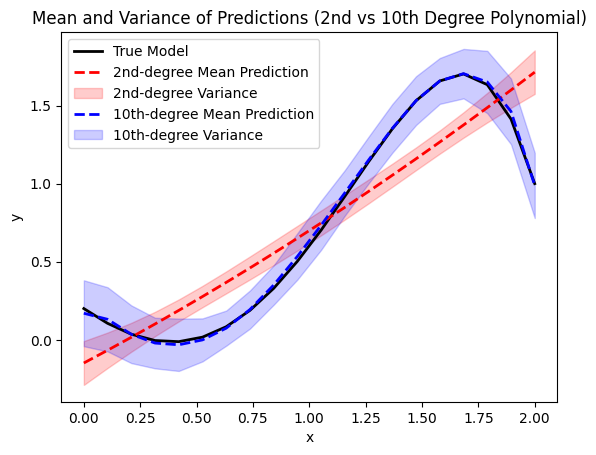

In [ ]:
# Generate test data
test_set, true_test_set = generate_points(seed=20)
x_test, _ = zip(*test_set)
_, y_true = zip(*true_test_set)

# Perform experiments for 2nd-degree polynomial
model = PolynomialRegressionExperiments(polynomial_degree=2)
predicted_values_2nd = model.run_experiments(x_test)
mean_predictions_2nd = np.mean(predicted_values_2nd, axis=0)
variance_predictions_2nd = np.var(predicted_values_2nd, axis=0)

# Perform experiments for 10th-degree polynomial
model = PolynomialRegressionExperiments(polynomial_degree=10)
predicted_values_10th = model.run_experiments(x_test)
mean_predictions_10th = np.mean(predicted_values_10th, axis=0)
variance_predictions_10th = np.var(predicted_values_10th, axis=0)

# Plot results
model.plot(x_test, mean_predictions_2nd, variance_predictions_2nd, mean_predictions_10th, variance_predictions_10th, y_true)

### Comparison

The red curve is unable to capture the true relationship of the data (e.g., it cannot approximate the higher-degree terms like $x^3$ and $x^5$). In this case the amount of bias is large and the variability is low. The small size of the variance indicates that the 2nd-degree polynomial produces stable predictions across the 100 experiments. This means that the model is less sensitive to noise in the training data, as it underfits the data and cannot capture the complexity of the true relationship.

On the other hand, the blue curve fits the data very well since it is superimposed with the black curve, which means that it overfits. Compared to the 2nd-degree polynomial, the variance is bigger, especially around regions with high curvature.

#### For Real-World Scenarios:

*   The 10th-degree polynomial might be useful in noise-free scenarios or when capturing detailed patterns is critical.
*   The 2nd-degree polynomial is preferable when stability is important, even at the cost of missing some patterns.

## 3. Encode Prior Knowloedge with Full Bayesian Inference

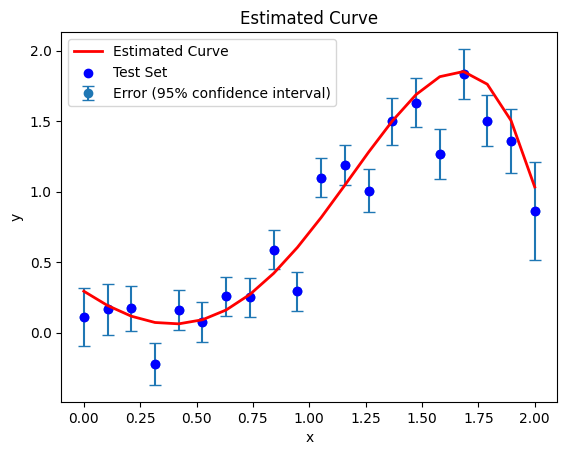

In [ ]:
# Generate training and test data
training_set, _ = generate_points(seed=30)
test_set, _ = generate_points(seed=31)

# Prior knowledge
prior_mean = np.array([0.2, -1.0, 0.9, 0.7, -0.2])
prior_cov = 0.1 * np.eye(5)

# Initialize and train our model
model = FullBayesianInference(training_set, test_set, prior_mean, prior_cov, DEFAULT_NOISE_VARIANCE)
y_pred, posterior_mean, posterior_cov, y_var = model.train()

# Plot results
model.plot(posterior_mean, y_var, y_pred)

The result from the Full Bayesian Inference (FBI) method shows a curve that closely resembles the one obtained using the Least Squares (LS) method.

This is because both methods use the same model structure (degree-5 polynomial without the x4x4 term) and both rely on the training data to estimate the parameters. Since the prior is very informative (centered exactly at the true values), the Bayesian posterior will be very close to the LS estimates.

One advantage of Bayesian inference is that it provides posterior uncertainty (through the posterior covariance matrix). This information is missing in LS. The length of the error bars around the curve indicate where the predictions are more uncertain.

### Repeat for Bigger Noise

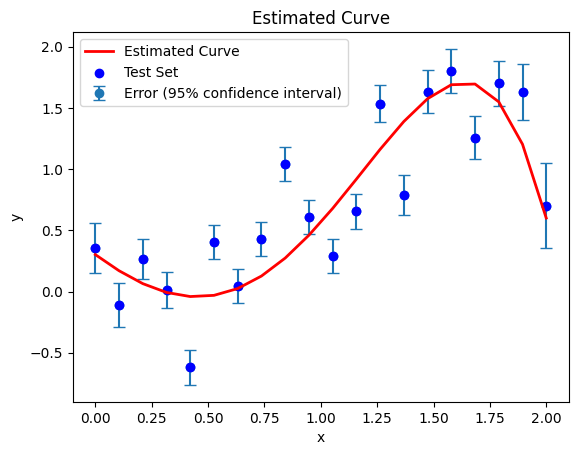

In [ ]:
#Repeat for noise_variance = 0.15
training_set, _ = generate_points(noise_variance = 0.15, seed=32)
test_set, _ = generate_points(noise_variance = 0.15, seed=33)

model = FullBayesianInference(training_set, test_set, prior_mean, prior_cov, DEFAULT_NOISE_VARIANCE)
y_pred, posterior_mean, posterior_cov, y_var = model.train()

model.plot(posterior_mean, y_var, y_pred)

Now that the noise level increased, the Bayesian approach relies more on the prior to stabilize the parameter estimates. The model remains robust even with higher noise, as the estimated curve still captures the general trend of the true function. This robustness is due to Bayesian inference effectively incorporating the prior information and combining it with the noisy data.

In both cases, the intervals expand in regions where the data is more sparse or where the polynomial curve changes rapidly, as these are areas where the model is less certain.

## 4. Bayesian Inference with Prior Mismatch: Impact of Variance and Sample Size




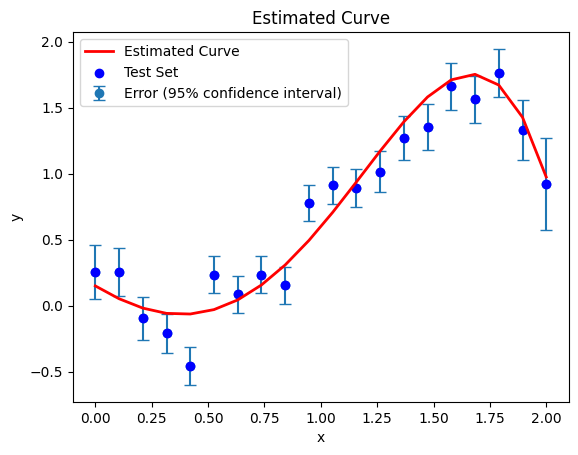

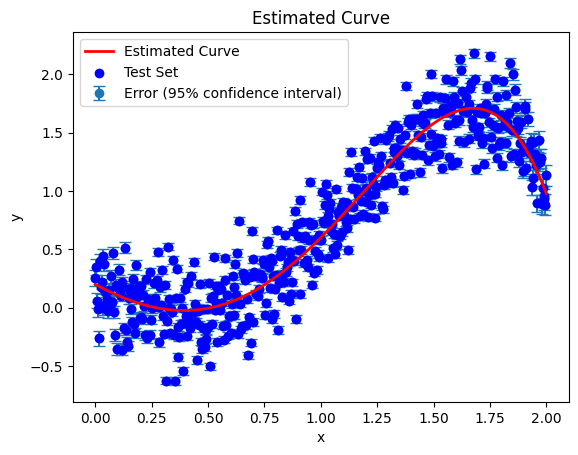

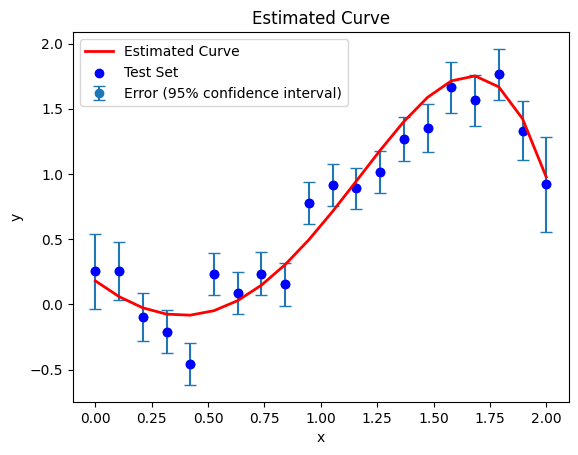

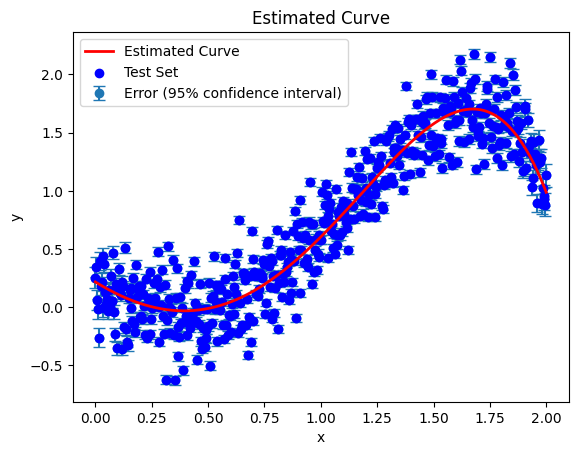

In [ ]:
new_prior_mean = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])
Ns = [20, 500]  # Two different values for N
prior_cov_values = [0.1 * np.eye(5), 2.0 * np.eye(5)]  # Two different values for prior covariance

# Run experiments
for prior_cov in prior_cov_values:
    for N in Ns:
        # Generate training and test data
        training_set, _ = generate_points(DEFAULT_NOISE_VARIANCE, N, seed=42)
        test_set, _ = generate_points(DEFAULT_NOISE_VARIANCE, N, seed=43)

        # Full Bayesian inference algorithm
        model = FullBayesianInference(training_set, test_set, prior_mean, prior_cov, DEFAULT_NOISE_VARIANCE)
        y_pred, posterior_mean, posterior_cov, y_var = model.train()

        # Plot results
        model.plot(posterior_mean, y_var, y_pred)

### Comparison
**High $N=500$, High Prior Covariance**

With a high number of data points, the influence of the prior diminishes, and the model relies heavily on the data. The predictions are accurate and uncertainty is minimal.

**Low $N=20$, High Prior Covariance**

When data is sparse, the prior covariance has a stronger influence. Since the prior allows for a wide range of parameter values, the model is more uncertain.

**Low $N=20$, Low Prior Covariance**

There is little data to inform the model, so the prior plays a stronger role in determining the posterior. This results in underfitting because it is obvious that the prior does not align well with the true function. Initially, the model predictions are affected by the prior because there isn’t enough data to override it.

**High $N=500$, Low Prior Covariance**

Although the model is biased towards the prior, a high N allows the data to dominate. The model achieves accurate predictions with less uncertainty. The likelihood starts to contribute more to the posterior early enough since we have a lot of data.

### Consideration:
- A high prior covariance is useful when we have more data at our disposal, as it allows the model to adapt to the data.
- A low prior covariance is useful when domain knowledge is strong, but it can lead to underfitting if the prior is misaligned with the data.

## 5. Variance Estimation Using Expectation-Maximization

In [ ]:
# Generate training data
training_set, _ = generate_points(N=500, seed=50)
x_train, y_train = zip(*training_set)

# Run EM algorithm
init_alpha = 1.0
init_beta =1.0
model = ExpectationMaximization(x_train, y_train, init_alpha, init_beta)
alpha, beta, mu_theta, sigma_theta, iterations = model.train()

# Print results
print(f"Number of iterations: {iterations}")
print(f"Recovered noise variance (1/beta): {1 / beta:.5f}")
print(f"Recovered parameter variance (1/alpha): {1 / alpha:.5f}")
print("Posterior mean of parameters:", mu_theta)

Number of iterations: 7
Recovered noise variance (1/beta): 0.04659
Recovered parameter variance (1/alpha): 0.30477
Posterior mean of parameters: [ 0.12162256 -0.59836986  0.45658736  0.8459693  -0.20355912]


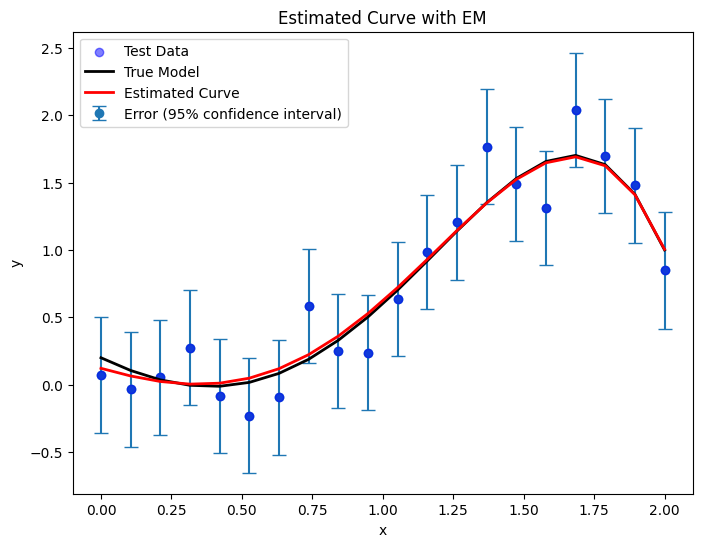

In [ ]:
# Generate test data
noisy_test_set, true_test_set = generate_points(seed=51)
x_test, y_test = np.array(noisy_test_set).T
_, y_true = np.array(true_test_set).T

X_test = np.array([[1, x_i, x_i**2, x_i**3, x_i**5] for x_i in x_test])

# Predicted mean and variance
y_pred = X_test @ mu_theta
y_var = 1 / beta + np.sum((X_test @ sigma_theta) * X_test, axis=1)
y_std = np.sqrt(y_var)

# Plot results
model.plot(x_test, y_test, y_true, y_pred, y_std)

The generated plot shows that the estimated curve (red line) closely follows the true curve (black line).

The "1e-6" tolerance came out by trial and error. This gives the best result with the smaller number of iterations. If we provide a smaller tolarenace value to the algorithm it will perform more iterations with the same result. By stating that this is the best result, it means that the revovered noise variancve is very close to the true variance and the recovered parameter variance has the smallest amount of uncertainty the algorithm can achieve.

Probably the prior chosen is good. If the prior precision ($1/α$) was poorly initialized or far from the true distribution, the posterior covariance ($Σ_θ$​) would be large, reflecting greater uncertainty in the parameters.

## 6. Non-Parametric Regression with Parzen Window Estimation

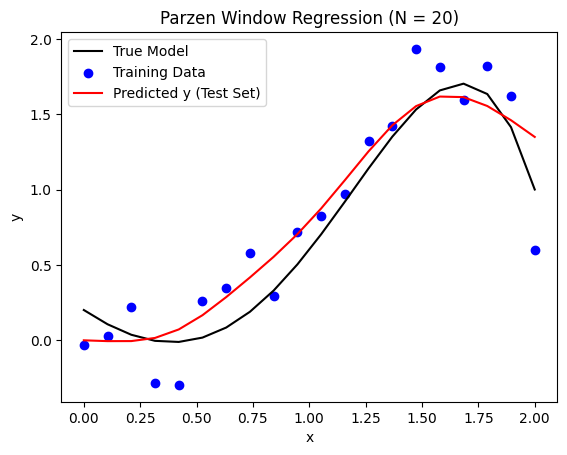

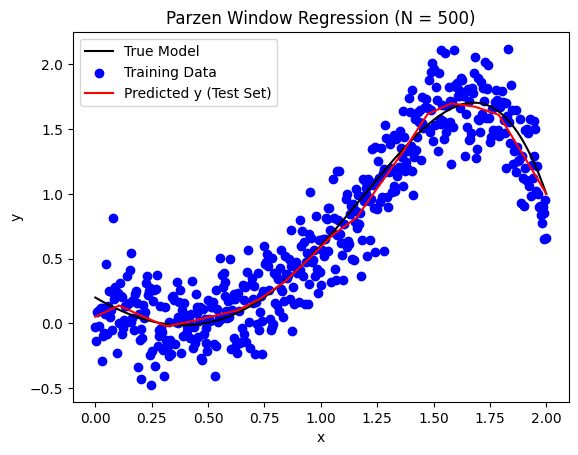

In [ ]:
# Parameters for the experiments
h_small = 1 / np.sqrt(20)  # For N = 20
h_large = 1 / np.sqrt(500)  # For N = 500

# Experiment 1: N = 20
training_set, _ = generate_points(N=20, seed=60)
x_train, y_train = zip(*training_set)

noisy_test_set, true_test_set = generate_points(N=20, seed=61)
x_test, y_test = zip(*noisy_test_set)
_, y_true = zip(*true_test_set)

model = ParzenWindowEstimation(x_test, training_set, h_small)
y_pred_20 = model.estimate()

model.plot(x_test, y_true, np.array(x_train), np.array(y_train), y_pred_20, "Parzen Window Regression (N = 20)", 20)

# Experiment 2: N = 500
training_set, _ = generate_points(N=500, seed=62)
x_train, y_train = zip(*training_set)

noisy_test_set, true_test_set = generate_points(N=20, seed=63)
x_test, y_test = zip(*noisy_test_set)
_, y_true = zip(*true_test_set)

model = ParzenWindowEstimation(x_test, training_set, h_large)
y_pred_500 = model.estimate()

model.plot(x_test, y_true, np.array(x_train), np.array(y_train), y_pred_500, "Parzen Window Regression (N = 500)", 500)

By definition we have that $$
\mathbb{E}[y | x] = \frac{\int y p(x, y) \, dy}{p(x)}
$$​The next step is to approximate the joint probability density p(x,y) and marginal probability density p(x) using their corresponding Parzen window representations.$$p(x, y) = \frac{1}{N(2 \pi h^2)^{L/2}} \sum_{i=1}^N \exp \left( -\frac{\|[x, y] - [x_i, y_i]\|^2}{2h^2} \right)
$$$$p(x) = \frac{1}{N(2 \pi h^2)^{L/2}} \sum_{i=1}^N \exp \left( -\frac{\|x - x_i\|^2}{2h^2} \right)
$$

After substituting in the conditional expectation formula and applying some simplifications, we derive the following formula:
$$
\mathbb{E}[y | x] = \frac{\sum_{i=1}^{N} y_i \exp \left( -\frac{\|x - x_i\|^2}{2h^2} \right)}{\sum_{i=1}^{N} \exp \left( -\frac{\|x - x_i\|^2}{2h^2} \right)}
$$
which is the MSE-optimal estimate and will help us estimate the y's over over a given test set.

In the N=20 case, we can observe that predictions were noisier and less smooth due to the limited number of training points. The method struggled to generalize effectively, and the estimated curve fluctuated significantly around the true model.

In contrast, with N=500, predictions appear to be smoother and more aligned with the true model. The larger dataset provided more reliable density estimates, improving the accuracy of E[y∣x].

Overall, the Parzen window method demonstrated the trade-off between bias and variance. With smaller datasets, the method suffers from high variance, leading to less accurate predictions. With larger datasets, the variance reduces, and predictions become more reliable but at a higher computational cost. This non-parametric approach is flexible but depends heavily on the size of the dataset.<br><br>

**Remark:** In Parzen Window estimation we have no information at all about the underlying generating mechanism of our data points. So one would expect it to perform slightly worse than Least Squares method. However, in this example, we observe that there is no significant difference in the estimated y-values between the two methods. This suggests that having prior knowledge about the data generating process may not always be crucial for achieving good performance.

## 7. Comparison & Discussion Time

In [ ]:
def compute_true_model_mse(test_set, theta_estimated):
    """
    Computes the mean squared error (MSE) for the True Model using the estimated parameters.

    Parameters:
        test_set (list): Input x and y values from the test set.
        theta_estimated (list): Estimated model parameters for the True Model.

    Returns:
        float: Mean squared error (MSE).
    """
    # Extract x and y values from the test set
    x_test, y_test = zip(*test_set)
    x_test = np.array(x_test)

    # Compute the predicted y values using the true model structure
    X = np.column_stack([x_test**0, x_test**1, x_test**2, x_test**3, x_test**5])
    y_pred = X @ theta_estimated

    # Compute the Mean Squared Error
    mse = np.mean((y_test - y_pred)**2)
    return mse


### LS Experiments 1-4 & 11-14

In [ ]:
def run_ls_experiment(M, N, N1, degree=None, exponents=None):
    """
    Runs the regression experiment for a specified polynomial degree or custom exponents.

    Parameters:
        M (int): Number of trials.
        N (int): Number of training points.
        N1 (int): Number of test points.
        degree (int, optional): Degree of the polynomial model. If specified,
                                creates a polynomial basis up to this degree.
        exponents (list, optional): Custom exponents for the polynomial basis.
                                    Overrides `degree` if provided.

    Returns:
        float: Mean squared error averaged over M trials.
    """
    # Determine exponents based on degree if not provided
    if exponents is None:
        if degree is None:
            raise ValueError("Either 'degree' or 'exponents' must be specified.")
        exponents = list(range(degree + 1))

    mse_values = []

    for trial in range(M):
        # Generate training and test sets with different seeds
        training_set, _ = generate_points(N=N, seed=trial)
        test_set, _ = generate_points(N=N1, seed=trial + 1000)

        # Train the model
        #Initialize our model
        model = PolynomialRegression(training_set, exponents=exponents)
        #Find theta parameters using Least Squares method
        theta_estimated = model.fit()

        # Extract x and y values from the test set
        x_test, y_test = zip(*test_set)

        # Compute the predicted y values
        y_pred = [
            sum(theta_estimated[j] * (x**exponents[j]) for j in range(len(exponents)))
            for x in x_test
        ]

        # Compute the mean squared error
        mse = sum((y_test[i] - y_pred[i])**2 for i in range(len(y_test))) / len(y_test)
        mse_values.append(mse)

    # Compute the expectation value of MSE (average over all trials)
    E_bar = np.mean(mse_values)
    return E_bar


In [ ]:
M = 1000  # Number of trials
N = 20    # Training points
N1 = 20   # Test points

# Experiment 1: True Model (Custom Exponents)
E_bar_true = run_ls_experiment(M, N, N1, exponents=[0, 1, 2, 3, 5])

# Experiment 2: 5th Degree Polynomial
E_bar_5th = run_ls_experiment(M, N, N1, degree=5)

# Experiment 3: 2nd Degree Polynomial
E_bar_2nd = run_ls_experiment(M, N, N1, degree=2)

# Experiment 4: 10th Degree Polynomial
E_bar_10th = run_ls_experiment(M, N, N1, degree=10)

# Display Results
print(f"Mean MSE for True Model: {E_bar_true:.5f}")
print(f"Mean MSE for 5th Degree Polynomial: {E_bar_5th:.5f}")
print(f"Mean MSE for 2nd Degree Polynomial: {E_bar_2nd:.5f}")
print(f"Mean MSE for 10th Degree Polynomial: {E_bar_10th:.5f}")

Mean MSE for True Model: 0.06143
Mean MSE for 5th Degree Polynomial: 0.06388
Mean MSE for 2nd Degree Polynomial: 0.13744
Mean MSE for 10th Degree Polynomial: 0.07669


In [ ]:
# Same as above, but with larger training sets (𝑁 = 500).
M = 1000  # Number of trials
N = 500    # Training points
N1 = 20   # Test points

# Experiment 11: True Model (Custom Exponents)
E_bar_true = run_ls_experiment(M, N, N1, exponents=[0, 1, 2, 3, 5])

# Experiment 12: 5th Degree Polynomial
E_bar_5th = run_ls_experiment(M, N, N1, degree=5)

# Experiment 13: 2nd Degree Polynomial
E_bar_2nd = run_ls_experiment(M, N, N1, degree=2)

# Experiment 14: 10th Degree Polynomial
E_bar_10th = run_ls_experiment(M, N, N1, degree=10)

# Display Results
print(f"Mean MSE for True Model: {E_bar_true:.5f}")
print(f"Mean MSE for 5th Degree Polynomial: {E_bar_5th:.5f}")
print(f"Mean MSE for 2nd Degree Polynomial: {E_bar_2nd:.5f}")
print(f"Mean MSE for 10th Degree Polynomial: {E_bar_10th:.5f}")

Mean MSE for True Model: 0.04945
Mean MSE for 5th Degree Polynomial: 0.04969
Mean MSE for 2nd Degree Polynomial: 0.13427
Mean MSE for 10th Degree Polynomial: 0.05091


The True Model achieves the lowest mean MSE (0.0614), as expected, because it precisely matches the generating function structure. This result validates the model's ability to perfectly fit the data when the exact functional form is used. This demonstrates the power of correctly specifying the model.

The 5th-degree polynomial model, which includes all terms up to $x^5$, shows a slightly higher mean MSE (0.0639). This small increase suggests that the model can closely approximate the true function but may slightly overfit or underfit due to the influence of noise or numerical instability in parameter estimation. This indicates that while the 5th-degree polynomial is nearly optimal, it cannot entirely replicate the precision of the true model.

In contrast, the 2nd-degree polynomial model produces a significantly higher mean MSE (0.1374). This result reflects the inability of the 2nd-degree polynomial to capture the complexity of the true function, which includes terms up to $x^5$. The lack of higher-order terms in the model leads to underfitting, as the model fails to adapt to the nonlinearity present in the data. This outcome highlights the limitations of using a simpler model when the underlying function is more complex.

The 10th-degree polynomial model shows a mean MSE of 0.0767, which is higher than both the true model and the 5th-degree polynomial but lower than the 2nd-degree polynomial. This result reflects a trade-off: while the 10th-degree polynomial has the capacity to fit the training data very well, it is more prone to overfitting due to its higher complexity. Overfitting causes the model to fit noise in the data which leads to a degradation in performance on the test set.

Overall, these results underscore the value of understanding the underlying data-generating process and using techniques like cross-validation to choose an appropriate model.

For $N=500$, the results show that the influence of model complexity diminishes with larger datasets, as all models except the 2nd-degree polynomial achieve similar performance. The 5th-degree polynomial model performs nearly identically with the true model, suggesting that with abundant data, it effectively approximates the true function without significant overfitting or underfitting. The 2nd-degree polynomial model is persistent to underfitting. Meanwhile, the 10th-degree polynomial model achieves comparable performance to the true model and 5th-degree model, indicating that the larger dataset reduces the risk of overfitting, allowing the model to generalize well despite its complexity. These findings show that with sufficient data, even high-complexity models can perform effectively.

### FBI Experiments 5-8 & 15-18

In [ ]:
def run_fbi_experiment(M, N, N1, prior_mean, prior_cov, noise_variance):
    """
    Runs a regression experiment using Fully Bayesian Inference (FBI) for a specified
    prior mean and covariance.

    Parameters:
        M (int): Number of trials to average over, for evaluating the model's robustness.
        N (int): Number of data points in the training set.
        N1 (int): Number of data points in the test set.
        prior_mean (np.ndarray): Mean of the prior distribution for the model parameters.
        prior_cov (np.ndarray): Covariance matrix of the prior distribution for the model parameters.
        noise_variance (float): Variance of the Gaussian noise added to the data.

    Returns:
        float: Mean squared error averaged over all trials (expected MSE).
    """
    mse_values = []

    for trial in range(M):
        # Generate training and test sets with different seeds
        training_set, _ = generate_points(noise_variance, N, seed=trial)
        test_set, _ = generate_points(noise_variance, N=N1, seed=trial + 1000)

        # Train the model
        # Full Bayesian inference algorithm
        model = FullBayesianInference(training_set, test_set, prior_mean, prior_cov, noise_variance)
        _, posterior_mean, _, _ = model.train()

        # Compute the mean squared error
        mse = compute_true_model_mse(test_set, posterior_mean)
        mse_values.append(mse)

    # Compute the expectation value of MSE (average over all trials)
    E_bar = np.mean(mse_values)
    return E_bar


In [ ]:
M = 1000  # Number of trials
N = 20    # Training points
N1 = 20   # Test points

prior_mean = np.array([0.2, -1.0, 0.9, 0.7, -0.2])
small_prior_cov = 0.1 * np.eye(5)

new_prior_mean = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004])
big_prior_cov = 2.0 * np.eye(5)

noise_variance = 0.05

# Experiment 5: True Theta Prior With Small Prior Variance
E_bar_true_prior_small_cov = run_fbi_experiment(M, N, N1, prior_mean, small_prior_cov, noise_variance)

# Experiment 6: False Theta Prior With Small Prior Variance
E_bar_false_prior_small_cov = run_fbi_experiment(M, N, N1, new_prior_mean, small_prior_cov, noise_variance)

# Experiment 7: True Theta Prior With Big Prior Variance
E_bar_true_prior_large_cov = run_fbi_experiment(M, N, N1, prior_mean, big_prior_cov, noise_variance)

# Experiment 8: False Theta Prior With Big Prior Variance
E_bar_false_prior_large_cov = run_fbi_experiment(M, N, N1, new_prior_mean, big_prior_cov, noise_variance)

# Display Results
print(f"Mean MSE with True Prior and Small Variance: {E_bar_true_prior_small_cov:.5f}")
print(f"Mean MSE with False Prior and Small Variance: {E_bar_false_prior_small_cov:.5f}")
print(f"Mean MSE with True Prior and Large Variance: {E_bar_true_prior_large_cov:.5f}")
print(f"Mean MSE with False Prior and Large Variance: {E_bar_false_prior_large_cov:.5f}")



Mean MSE with True Prior and Small Variance: 0.05614
Mean MSE with False Prior and Small Variance: 0.31231
Mean MSE with True Prior and Large Variance: 0.05870
Mean MSE with False Prior and Large Variance: 0.06152


In [ ]:
# Same as above, but with larger training sets (𝑁 = 500).
M = 1000  # Number of trials
N = 500    # Training points
N1 = 20   # Test points

# Experiment 15: True Theta Prior With Small Prior Variance
E_bar_true_prior_small_cov = run_fbi_experiment(M, N, N1, prior_mean, small_prior_cov, noise_variance)

# Experiment 16: False Theta Prior With Small Prior Variance
E_bar_false_prior_small_cov = run_fbi_experiment(M, N, N1, new_prior_mean, small_prior_cov, noise_variance)

# Experiment 17: True Theta Prior With Big Prior Variance
E_bar_true_prior_large_cov = run_fbi_experiment(M, N, N1, prior_mean, big_prior_cov, noise_variance)

# Experiment 18: False Theta Prior With Big Prior Variance
E_bar_false_prior_large_cov = run_fbi_experiment(M, N, N1, new_prior_mean, big_prior_cov, noise_variance)

# Display Results
print(f"Mean MSE with True Prior and Small Variance: {E_bar_true_prior_small_cov:.5f}")
print(f"Mean MSE with False Prior and Small Variance: {E_bar_false_prior_small_cov:.5f}")
print(f"Mean MSE with True Prior and Large Variance: {E_bar_true_prior_large_cov:.5f}")
print(f"Mean MSE with False Prior and Large Variance: {E_bar_false_prior_large_cov:.5f}")

Mean MSE with True Prior and Small Variance: 0.04931
Mean MSE with False Prior and Small Variance: 0.05255
Mean MSE with True Prior and Large Variance: 0.04941
Mean MSE with False Prior and Large Variance: 0.04946


#### Small Dataset ($N=20$):

- In scenarios with limited data, the choice and accuracy of the prior have a significant impact on performance. A correct prior (with small or large variance) consistently outperforms an incorrect one.
- Confidence in a prior (small variance) is only beneficial when the prior is accurate. Otherwise, it leads to poor performance.

#### Large Dataset ($N=500$):

- As the dataset size increases, the influence of the prior diminishes. Both correct and incorrect priors (with small or large variance) yield similar performance, with the model relying primarily on the data.
- This highlights the robustness of Bayesian Inference when there are a lot of data available, where the prior acts more as a starting point than a strict guide.

#### Role of Variance:

- Small Variance: Strongly influences the posterior when the dataset is small. Beneficial with a correct prior but harmful with an incorrect one.
- Large Variance: Provides flexibility, allowing the model to rely on the data. This configuration is safer when there is uncertainty about the accuracy of the prior.

#### True vs. False Prior:

- A true prior is always advantageous, but its impact decreases as the dataset grows.
- An incorrect prior is problematic with small datasets, especially if coupled with small variance. However, its influence diminishes with larger datasets or higher variance.

### EM Experiments 9 & 19

In [ ]:
def run_em_experiment(M, N, N1):
    """
    Runs a regression experiment using Expectation MAximization.

    Parameters:
        M (int): Number of trials to average over, for evaluating the model's robustness.
        N (int): Number of data points in the training set.
        N1 (int): Number of data points in the test set.

    Returns:
        float: Mean squared error averaged over all trials (expected MSE).
    """
    mse_values = []

    for trial in range(M):
        # Generate training and test sets with different seeds
        training_set, _ = generate_points(noise_variance, N, seed=trial)
        x_train, y_train = zip(*training_set)

        test_set, _ = generate_points(noise_variance, N=N1, seed=trial + 1000)

        # Train the model
        model = ExpectationMaximization(x_train, y_train, init_alpha=1.0, init_beta=1.0)
        _, _, mu_theta, _, _ = model.train()


        # Compute the mean squared error
        mse = compute_true_model_mse(test_set, mu_theta)
        mse_values.append(mse)

    # Compute the expectation value of MSE (average over all trials)
    E_bar = sum(mse_values) / len(mse_values)
    return E_bar


In [ ]:
M = 1000  # Number of trials
N = 20    # Training points
N1 = 20   # Test points

# Experiment 9
E_bar_20 = run_em_experiment(M, N, N1)

N=500

# Experiment 19
E_bar_500 = run_em_experiment(M, N, N1)

# Display Results
print(f"Mean MSE with N=20: {E_bar_20:.5f}")
print(f"Mean MSE with N=500: {E_bar_500:.5f}")


Mean MSE with N=20: 0.06228
Mean MSE with N=500: 0.04944


**With $N=20$ (Small Training Dataset):**

The mean MSE is slightly higher than the true model's performance in the Least Squares experiments, indicating that EM is highly effective even with limited training data. This indicates its capacity to generalize from limited information by leveraging iterative refinement.

However, with limited data, the algorithm's ability to fully capture the underlying function may be constrained, especially in the presence of noise.

**With $N=500$ (Large Training Dataset):**
        
The mean MSE is nearly identical to the true model's performance, indicating that with abundant data, EM converges to parameter estimates that closely match the true generating function.

The improvement over the $N=20$ case highlights the advantage of more data, allowing the EM algorithm to make more accurate estimates of the underlying parameters. With larger datasets, the model better separates the signal from noise.

### Parzen Windows Experiments 10 & 20

In [ ]:
def run_parzen_experiment(M, N, N1, h, noise_variance):
    """
    Runs a regression experiment using Parzen window regression.

    Parameters:
        M (int): Number of trials to average over, for evaluating the model's robustness.
        N (int): Number of data points in the training set.
        N1 (int): Number of data points in the test set.
        h (float): Bandwidth for the Parzen window kernel.
        noise_variance (float): Variance of the Gaussian noise added to the data.

    Returns:
        float: Mean squared error averaged over all trials (expected MSE).
    """
    mse_values = []

    for trial in range(M):
        # Generate training and test sets with different seeds
        training_set, _ = generate_points(noise_variance, N, seed=trial)
        test_set, _ = generate_points(noise_variance, N=N1, seed=trial + 1000)

        # Extract x and y values from the test set
        x_test, y_test = zip(*test_set)
        x_test = np.array(x_test)
        y_test = np.array(y_test)

        # Predict y values using Parzen window regression
        model = ParzenWindowEstimation(x_test, training_set, h)
        y_pred = model.estimate()

        # Compute the mean squared error
        mse = np.mean((y_test - y_pred)**2)
        mse_values.append(mse)

    # Compute the expectation value of MSE (average over all trials)
    E_bar = np.mean(mse_values)
    return E_bar


In [ ]:
M = 1000  # Number of trials
N = 20    # Number of training points
N1 = 20   # Number of test points
h = 0.13  # Bandwidth for Parzen window
noise_variance = 0.05

# Experiment 10
E_bar_20 = run_parzen_experiment(M, N, N1, h, noise_variance)

N=500
h = 0.02

# Experiment 20
E_bar_500 = run_parzen_experiment(M, N, N1, h, noise_variance)

# Display the result
print(f"Mean MSE for Parzen Window (h=0.13) and N=20: {E_bar_20:.5f}")
print(f"Mean MSE for Parzen Window (h=0.02) and N=500: {E_bar_500:.5f}")


Mean MSE for Parzen Window (h=0.13) and N=20: 0.06669
Mean MSE for Parzen Window (h=0.02) and N=500: 0.05216


#### Results for Bandwidth ($h$) Values & $N=20$:

- $h=0.01$: $\hat{E}=0.09916$
- $h=0.11$: $\hat{E}=0.06716$
- $h=0.12$: $\hat{E}=0.06681$
- $h=0.13$: $\hat{E}=0.06669$ (Lowest)
- $h=0.14$: $\hat{E}=0.06676$
- $h=0.89$: $\hat{E}=0.24861$
- $h=1.00$: $\hat{E}=0.27771$

#### Results for Bandwidth ($h$) Values & $N=500$:

- $h=0.01$: $\hat{E}=0.05494$
- $h=0.02$: $\hat{E}=0.05216$ (Lowest)
- $h=0.10$: $\hat{E}=0.05495$
- $h=0.14$: $\hat{E}=0.05861$
- $h=1.00$: $\hat{E}=0.27526$

Bandwidth Selection is Critical: The results emphasize the importance of tuning $h$. A bandwidth too small or too large significantly reduces performance, while an optimal bandwidth can effectively balance bias and variance.

The results reveal how the dataset size ($N$) significantly influences the optimal bandwidth ($h$) and the overall performance of the Parzen Window regression. Smaller %h% values lead to overfitting, as the kernel becomes too localized, fitting the noise rather than the underlying signal. Conversely, larger $h$ values result in underfitting, where the kernel is overly smooth and fails to capture important data patterns.

For $N=500$, the increased dataset size shifts the optimal bandwidth to a much narrower $h$, reflecting the model's ability to leverage the abundant data for better predictions. As $N$ grows, smaller kernels can generalize well because the density of training points provides sufficient information within narrow windows. The loss in performance at larger $h$ persists, stating that excessive smoothing sacrifices accuracy even with a large dataset.

These results underscore the importance of tuning $h$ not only to the problem's nature but also to the dataset size, as the optimal bandwidth decreases with larger datasets to accommodate the finer resolution of available information.

#### Concluding Remarks

The experiment demonstrates the importance of selecting an appropriate bandwidth for Parzen Window regression. With this method there is a need for systematic testing to find the optimal $h$.

# Problem 2.1

## Overview

This task focuses on implementing a k-Nearest Neighbors (k-NN) classifier for two datasets: rice varieties and breast cancer diagnosis. It encompasses key steps in the machine learning pipeline, such as data preprocessing, distance metric implementation, model evaluation using k-fold cross-validation, and visualization of results.

Classification is defined as the search for the structures in a pattern set, and the subsequent labelling of the structures into categories such that the degree of association is high among the structures of the same category and low between the structures of different categories. **k-NN algorithm** will evaluate the nearest data points to the input and use their labels to predict the class of the new data point. (Choudhary, A. K-Nearest Neighbors (K-NN): Classification & Regression Problem. Medium (2024))

## Data Handling

### Data Cleaning  
This section outlines the steps taken to prepare the dataset for analysis and ensure it is ready for machine learning:

1. **Load Data**: Read the dataset from the provided file and extract relevant sections.  

2. **Data Conversion**: Convert the raw data into a structured pandas DataFrame and assign appropriate data types to numeric columns.  

3. **Handle Missing Values**: Identify and drop rows containing missing values to maintain data integrity.  

4. **Remove Duplicates**: Identify duplicate entries and remove them to avoid redundancy.

5. **Target Variable Encoding**: Convert the target variable (`Class`) into binary form for classification tasks.  

6. **Normalize Features**: Apply Min-Max scaling to numeric features for consistent feature scaling.  

7. **Prepare Features and Target**: Split the cleaned dataset into feature (`X`) and target (`y`) arrays.  

After these steps, the datasets will be cleaned and ready for the KNN classification model.

#### Rice Varieties

---
https://www.muratkoklu.com/datasets/


In [ ]:
import pandas as pd
import numpy as np

In [5]:
# Loading data
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving Rice_Cammeo_Osmancik.txt to Rice_Cammeo_Osmancik.txt


In [9]:
# Step 1: Read the dataset
file_path_rice = "Rice_Cammeo_Osmancik.txt"
with open(file_path_rice, 'r') as file:
    lines = file.readlines()

In [10]:
# Extract the data section
data1_start_index = lines.index("DATA\n") + 1
data1 = [line.strip() for line in lines[data1_start_index:] if line.strip()]

In [11]:
# Step 2: Convert data to a DataFrame
columns1 = ["Area", "Perimeter", "Major_Axis_Length", "Minor_Axis_Length",
           "Eccentricity", "Convex_Area", "Extent", "Class"]
data1 = [line.split(",") for line in data1]
rice_df = pd.DataFrame(data1, columns=columns1)

# Convert numeric columns to appropriate data types
numeric_columns = columns1[:-1]
rice_df[numeric_columns] = rice_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [12]:
# Step 3: Missing values count
print("\nMissing Values Before Cleaning:")
print(rice_df.isnull().sum())

# Handle Missing Values (if any) - Drop rows with missing values
rice_df.dropna(inplace=True)


Missing Values Before Cleaning:
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64


In [19]:
# Step 4: Check for Duplicates
duplicates_count = rice_df.duplicated().sum()
print(f"\nNumber of duplicate rows before cleaning: {duplicates_count}")

# Remove duplicates (if any)
rice_df.drop_duplicates(inplace=True)


Number of duplicate rows before cleaning: 0


In [20]:
# Step 5: Encode the target variable
rice_df["Class"] = rice_df["Class"].apply(lambda x: 0 if x == "Cammeo" else 1)

# Step 6: Normalize the features
def normalize(column):
    """Normalize a pandas column using Min-Max scaling."""
    return (column - column.min()) / (column.max() - column.min())

for col in numeric_columns:
    rice_df[col] = normalize(rice_df[col])

# Step 7: Split features and target
X_rice = rice_df[numeric_columns].values  # Features
y_rice = rice_df["Class"].values          # Target

In [21]:
# Final Data Overview
print("\nFinal Data Overview After Cleaning:")
print(rice_df.info())  # Data types and non-null counts
print(f"\nNumber of duplicate rows removed: {duplicates_count - rice_df.duplicated().sum()}")
print(f"Number of rows remaining: {rice_df.shape[0]}")

# The dataset is now cleaned and ready for machine learning
print("Data cleaning completed. Features and target are ready for KNN.")


Final Data Overview After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 238.3 KB
None

Number of duplicate rows removed: 0
Number of rows remaining: 3810
Data cleaning completed. Features and target are ready for KNN.


#### Breast Cancer Diagnosis

---

https://www.kaggle.com/datasets/rahmasleam/breast-cancer/data

In [36]:
# Loading data
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [37]:
# Load the file into a pandas DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
print(f"Uploaded file: {file_name}")

Uploaded file: breast-cancer.csv


In [57]:
# Step 1: Convert data to a DataFrame
df_cancer = pd.read_csv(file_name)

In [58]:
# Step 2: Missing values count
print("\nMissing Values Before Cleaning:")
print(df_cancer.isnull().sum())

# Handle Missing Values (if any) - Drop rows with missing values
df_cancer.dropna(inplace=True)


Missing Values Before Cleaning:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [40]:
# Step 3: Check for Duplicates
duplicates_count = df_cancer.duplicated().sum()
print(f"\nNumber of duplicate rows before cleaning: {duplicates_count}")

# Remove duplicates (if any)
df_cancer.drop_duplicates(inplace=True)


Number of duplicate rows before cleaning: 0


In [41]:
# Step 4: Target Variable Encoding
df_cancer["diagnosis"] = df_cancer["diagnosis"].apply(lambda x: 1 if x == "M" else 0)

# Step 5: Normalize Features
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

feature_columns = df_cancer.columns[2:]  # Select all columns except 'id' and 'diagnosis'
for col in feature_columns:
    df_cancer[col] = min_max_scaling(df_cancer[col])

# Step 6: Prepare Features and Target
X_bc = df_cancer[feature_columns].values  # Features
y_bc = df_cancer["diagnosis"].values      # Target

In [42]:
# Final Data Overview
print("\nFinal Data Overview After Cleaning:")
print(df_cancer.info())  # Data types and non-null counts
print(f"\nNumber of duplicate rows removed: {duplicates_count - df_cancer.duplicated().sum()}")
print(f"Number of rows remaining: {df_cancer.shape[0]}")

# The dataset is now cleaned and ready for machine learning
print("Data cleaning completed. Features and target are ready for KNN.")


Final Data Overview After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    fl

Both datasets were well-structured and they didn't need complicated pre-processing.

### Data Overview

This section provides a summary of the dataset to understand its structure and identify any potential issues:
1. **Dataset Overview:** Check data.
2. **Summary Statistics:** Review the statistics of numeric features.
3. **Class Distribution:** Ensure the classes are balanced.
4. **Correlation Matrix:** Understand relationships between features.

#### Rice Varieties

In [ ]:
# Data Overview
print((rice_df.head))

<bound method NDFrame.head of           Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     0.675937   0.879232           0.901216           0.532417      0.888011   
1     0.625330   0.714095           0.648087           0.670663      0.691980   
2     0.623394   0.750066           0.734349           0.588124      0.789846   
3     0.495071   0.524136           0.512800           0.581461      0.671227   
4     0.628146   0.781992           0.709138           0.620288      0.758067   
...        ...        ...                ...                ...           ...   
3805  0.342369   0.299758           0.269049           0.546223      0.509725   
3806  0.358564   0.328975           0.239480           0.623415      0.401801   
3807  0.430030   0.440458           0.408641           0.567997      0.608474   
3808  0.205158   0.175325           0.169922           0.389045      0.569017   
3809  0.341753   0.240882           0.168698           0.652692      0.283764  

In [ ]:
print("\nSummary Statistics:")
print(rice_df.describe())  # Summary statistics for numeric features


Summary Statistics:
              Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  3810.000000  3810.000000        3810.000000        3810.000000   
mean      0.450337     0.502462           0.464145           0.557828   
std       0.152470     0.188000           0.186127           0.119346   
min       0.000000     0.000000           0.000000           0.000000   
25%       0.336164     0.354086           0.310300           0.483217   
50%       0.428666     0.474013           0.432505           0.560346   
75%       0.563193     0.657969           0.621743           0.637601   
max       1.000000     1.000000           1.000000           1.000000   

       Eccentricity  Convex_Area       Extent        Class  
count   3810.000000  3810.000000  3810.000000  3810.000000  
mean       0.642005     0.459696     0.452433     0.572178  
std        0.121901     0.156204     0.212406     0.494828  
min        0.000000     0.000000     0.000000     0.000000  
25%        0.557

In [ ]:
print("\nClass Distribution:")
print(rice_df["Class"].value_counts())  # Check if classes are balanced


Class Distribution:
Class
1    2180
0    1630
Name: count, dtype: int64


In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix = rice_df.corr()
print(correlation_matrix)  # Correlation between features


Correlation Matrix:
                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.966453           0.903015           0.787840   
Perimeter          0.966453   1.000000           0.971884           0.629828   
Major_Axis_Length  0.903015   0.971884           1.000000           0.452092   
Minor_Axis_Length  0.787840   0.629828           0.452092           1.000000   
Eccentricity       0.352095   0.544601           0.710897          -0.291683   
Convex_Area        0.998939   0.969937           0.903381           0.787318   
Extent            -0.061184  -0.130923          -0.139562           0.063366   
Class             -0.746400  -0.806572          -0.827824          -0.370355   

                   Eccentricity  Convex_Area    Extent     Class  
Area                   0.352095     0.998939 -0.061184 -0.746400  
Perimeter              0.544601     0.969937 -0.130923 -0.806572  
Major_Axis_Length      0.710897     0.903381 -0.139562 -0

This dataset includes 3810 observations of normalized features ranging between 0 and 1. In general, the spread of the variables seems appropriate with means near the middle range, though many minimum values are 0, which could mean potential outliers for several features. The strong correlations among the features, including Area, Perimeter, and Major_Axis_Length, indicate the presence of multicollinearity. In contrast, the variable Extent is only weakly correlated with most of the features, suggesting that it captures a somewhat different aspect of the data. Moreover, the negative correlation of Class with most geometric features indicates a strong relationship between those features and class distinction.

#### Breast Cancer Diagnosis

In [ ]:
# Data Overview
print(df_cancer.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1     0.521037      0.022658        0.545989   0.363733   
1    842517          1     0.643144      0.272574        0.615783   0.501591   
2  84300903          1     0.601496      0.390260        0.595743   0.449417   
3  84348301          1     0.210090      0.360839        0.233501   0.102906   
4  84358402          1     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   ...  radius_worst  texture_worst  perimeter_worst  ar

In [ ]:
print("\nSummary Statistics:")
print(df_cancer.describe())  # Summary statistics for numeric features


Summary Statistics:
                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583     0.338222      0.323965        0.332935   
std    1.250206e+08    0.483918     0.166787      0.145453        0.167915   
min    8.670000e+03    0.000000     0.000000      0.000000        0.000000   
25%    8.692180e+05    0.000000     0.223342      0.218465        0.216847   
50%    9.060240e+05    0.000000     0.302381      0.308759        0.293345   
75%    8.813129e+06    1.000000     0.416442      0.408860        0.416765   
max    9.113205e+08    1.000000     1.000000      1.000000        1.000000   

        area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count  569.000000       569.000000        569.000000      569.000000   
mean     0.216920         0.394785          0.260601        0.208058   
std      0.149274         0.126967          0.161992        

In [ ]:
print("\nClass Distribution:")
print(df_cancer['diagnosis'].value_counts())  # Check if classes are balanced


Class Distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix = df_cancer.corr()
print(correlation_matrix)  # Correlation between features


Correlation Matrix:
                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radi

The dataset consists of 569 examples with normalized features between 0 and 1. Important features include radius_mean, perimeter_mean, and area_mean; all these are highly related to each other, therefore showing possibly multicollinearity. There may be some outliers since the minimum value of some features is 0. The target variable diagnosis is highly positively correlated with some features, including concave points_mean and radius_mean, being able to be taken as very significant predictors. In contrast, fractal_dimension_mean has weak or negative correlations with most features, which may indicate that it captures information different from the rest. Overall, the data is well-structured for analysis, with some features standing out as critical for diagnosis prediction.

### Data Visualization

This section visualizes the data for better understanding and detecting anomalies:
1. **Feature Distributions:** Visualize the distribution of numeric features using histograms.
2. **Box Plots:** Identify outliers in each feature.
3. **Class Distribution:** Show the number of samples per class.
4. **Correlation Heatmap:** Display correlations between features.

#### Rice varieties

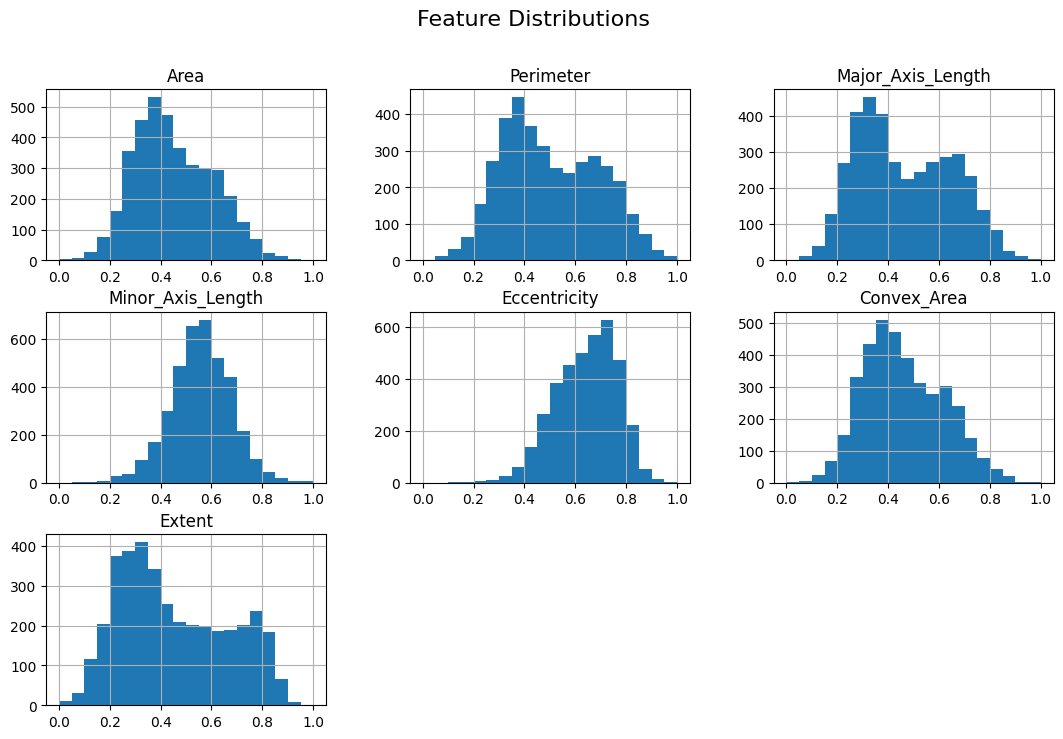

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Distributions
rice_df[numeric_columns].hist(figsize=(13, 8), bins=20)
# plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

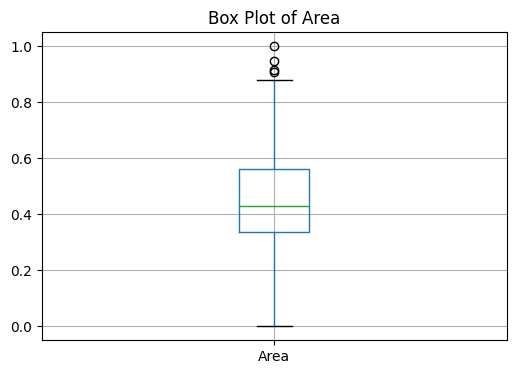

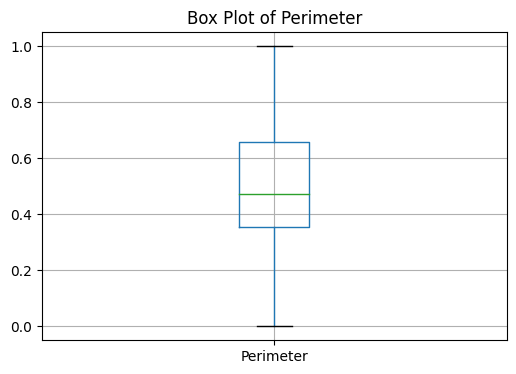

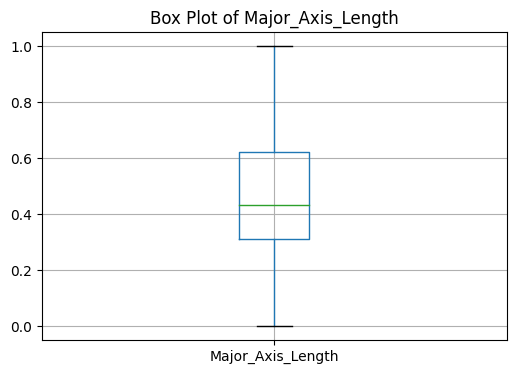

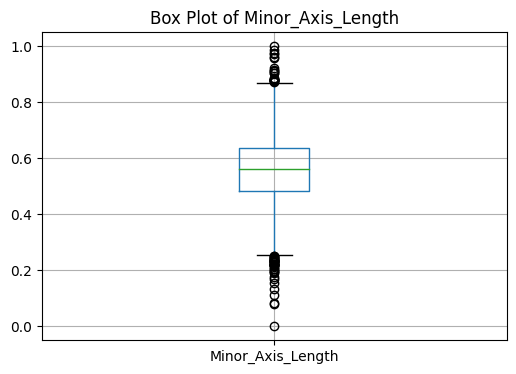

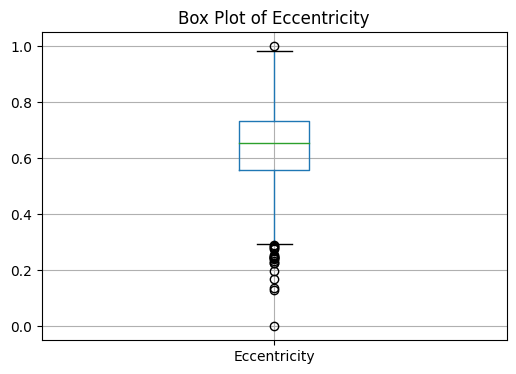

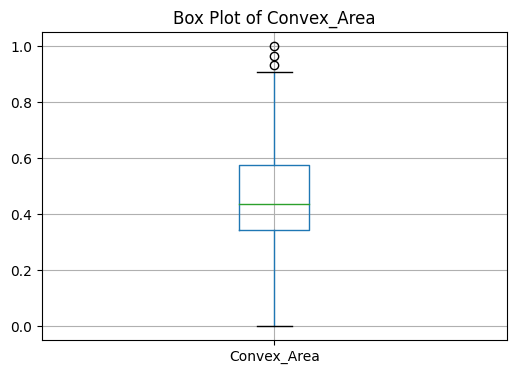

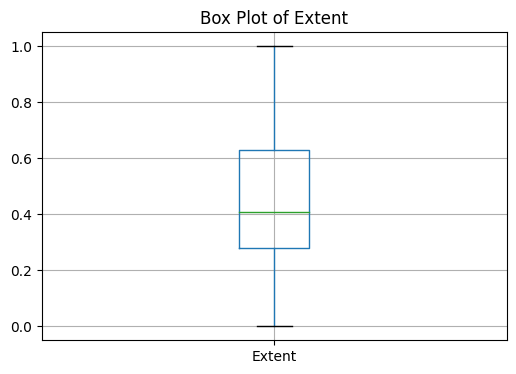

In [ ]:
# 2. Box Plots for Outliers
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    rice_df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

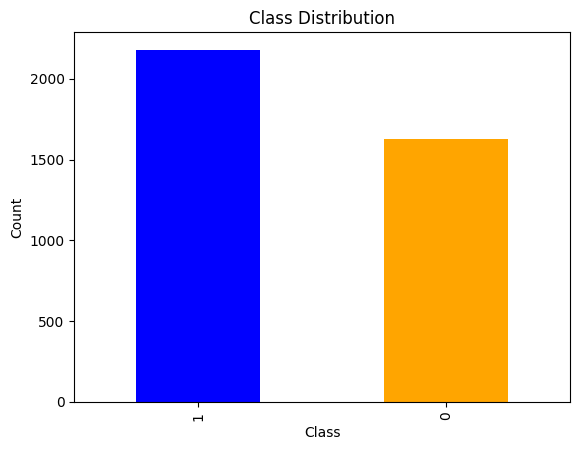

In [ ]:
# 3. Class Distribution
rice_df["Class"].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

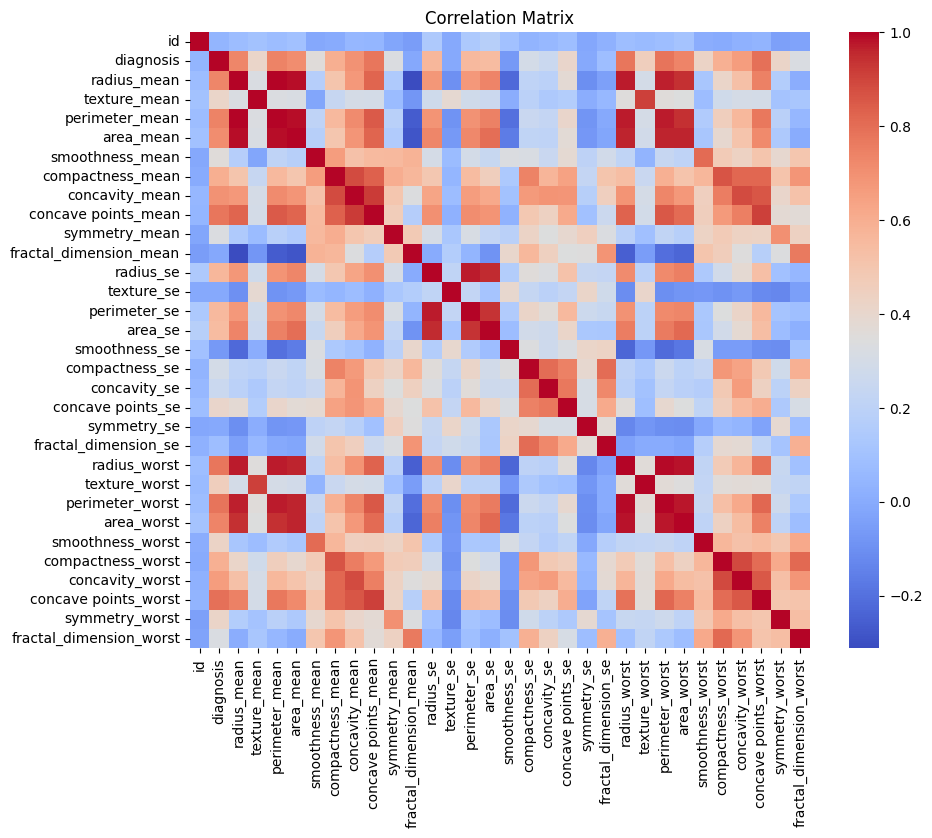

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Breast Cancer Diagnosis

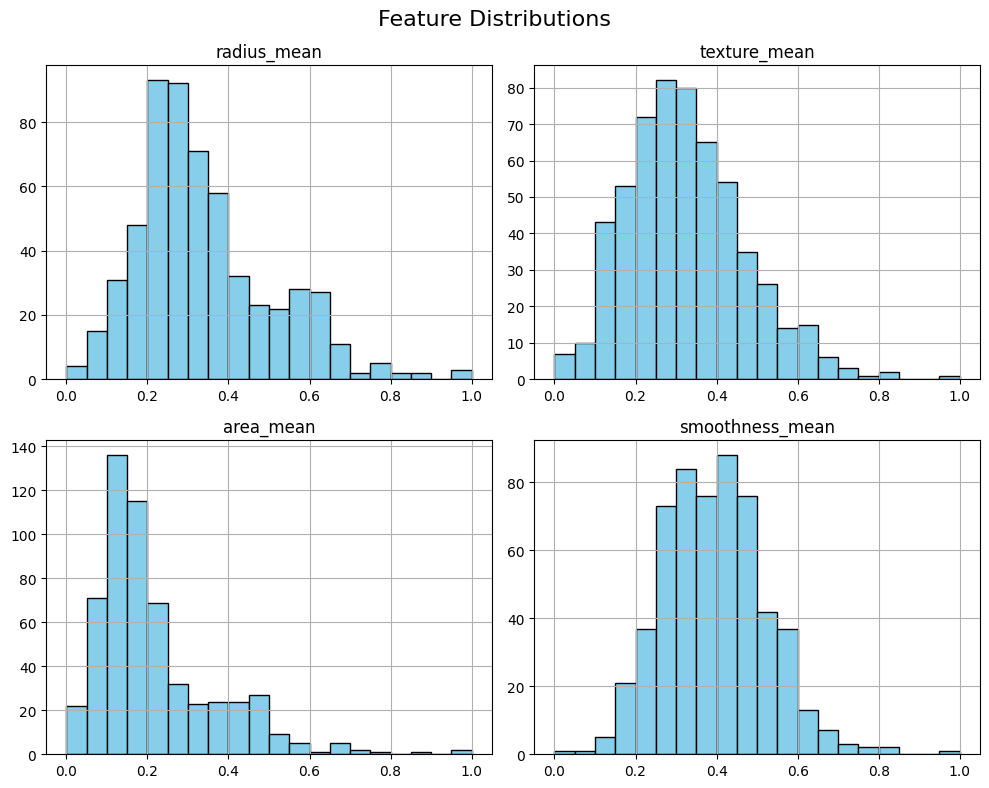

In [ ]:
# Select key features for visualization
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']

# Plot histograms
df_cancer[selected_features].hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

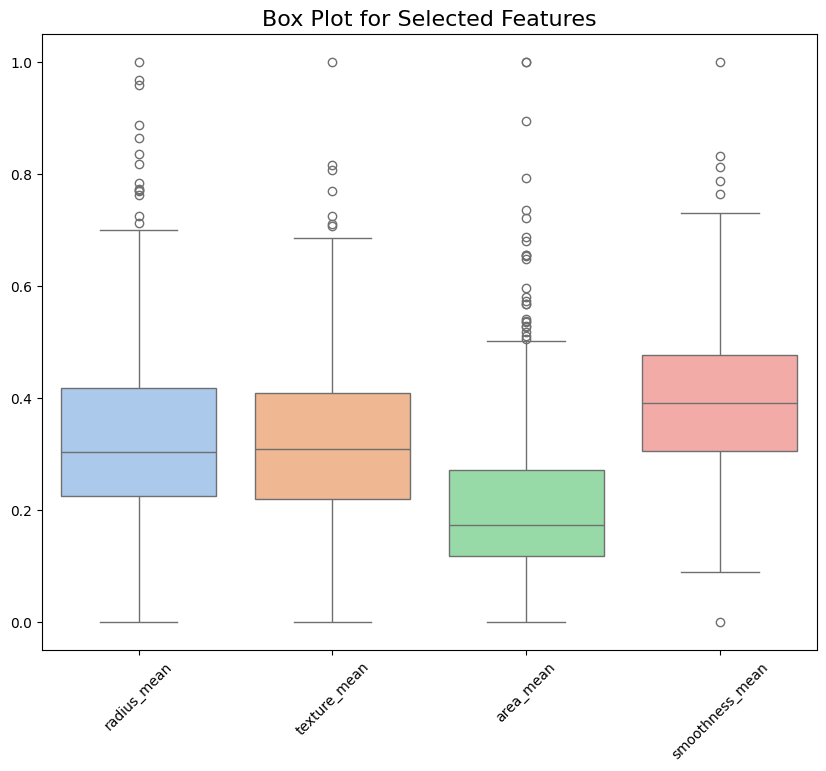

In [ ]:
# Plot box plots for selected features
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cancer[selected_features], palette="pastel")
plt.title("Box Plot for Selected Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

C:\Users\dvoul\AppData\Local\Temp\ipykernel_4632\1421157424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cancer, x='diagnosis', palette="pastel")


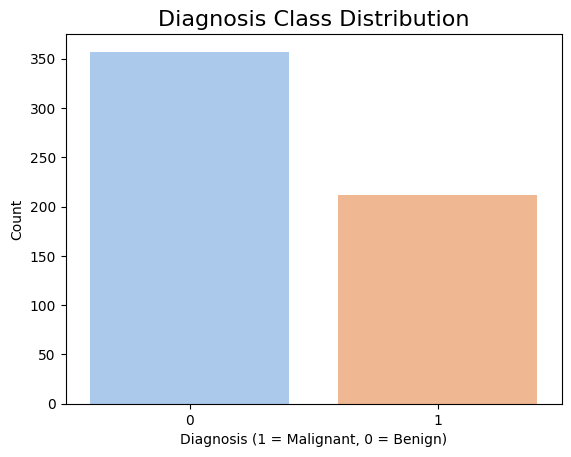

In [ ]:
sns.countplot(data=df_cancer, x='diagnosis', palette="pastel")
plt.title("Diagnosis Class Distribution", fontsize=16)
plt.xlabel("Diagnosis (1 = Malignant, 0 = Benign)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = df_cancer.drop(['id', 'diagnosis'], axis=1).corr()

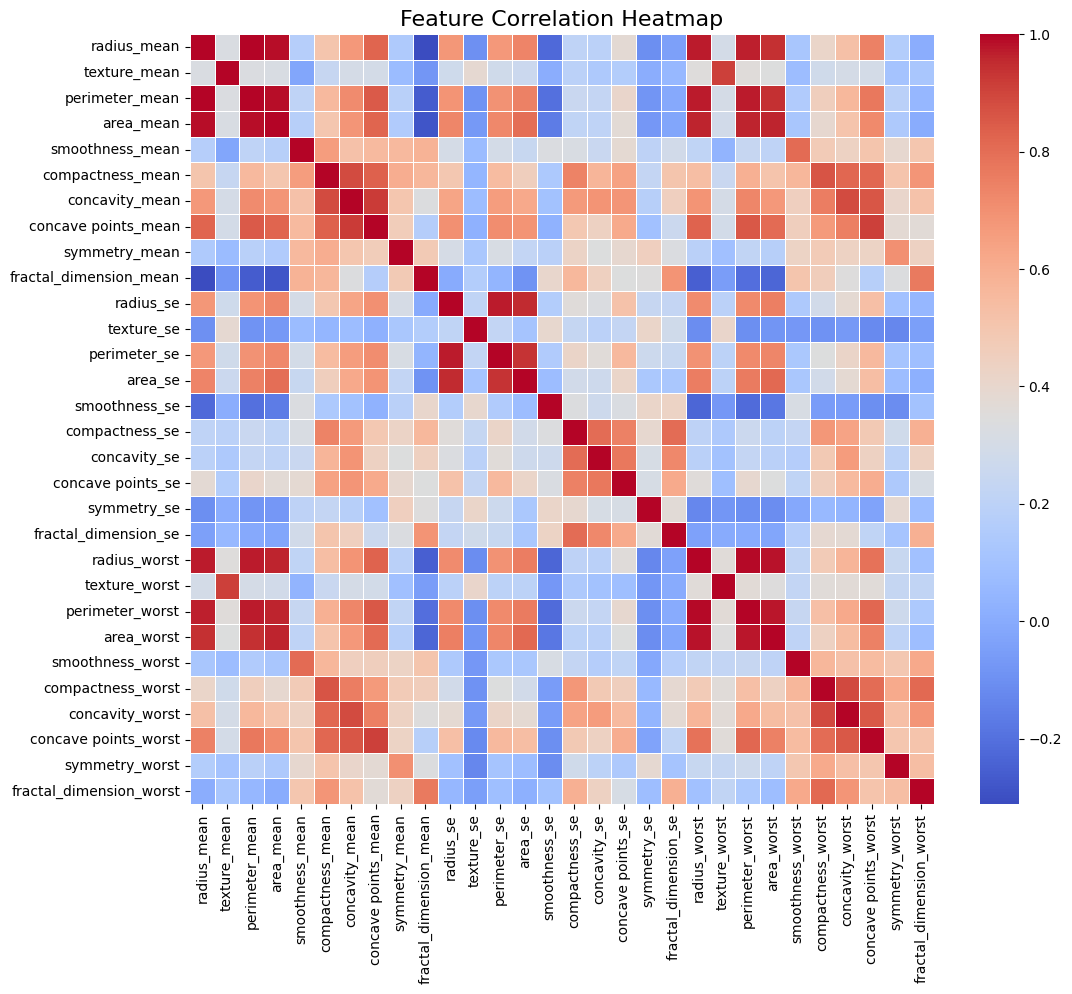

In [ ]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

## k-NN Algorithm

### Part 1: Distance calculation

Implemented Methods:
- Euclidean: Suitable for normalized numeric features.
- Manhattan: Provides a different perspective by summing absolute differences.
- Hamming: Effective for categorical features.

In [13]:
# Create a class of methods to calculate distance between points using various techniques
class distanceMetrics:
    """
  Description:
   This class contains methods to calculate distance between points using various techniques.
  """
    @staticmethod
    def euclidean_distance(point1, point2):
        assert len(point1) == len(point2), "Points must have the same dimensions."
        return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

    @staticmethod
    def manhattan_distance(point1, point2):
        assert len(point1) == len(point2), "Points must have the same dimensions."
        return sum(abs(p1 - p2) for p1, p2 in zip(point1, point2))

    @staticmethod
    def hamming_distance(point1, point2):
        assert len(point1) == len(point2), "Points must have the same dimensions."
        return sum(p1 != p2 for p1, p2 in zip(point1, point2))

### Part 2: Finding Nearest Neighbors and Predict the Class

Implements key methods:
- fit: Stores training data.
- getNeighbors: Finds nearest neighbors for test samples.
- predict: Uses majority voting among neighbors.

In [14]:
import operator

class kNNClassifier:

    def __init__(self, k, distanceMetric = 'euclidean_distance'):
        '''
        Description:
            KNearestNeighbors constructor
        Input
            k: total of neighbors.
            distanceMetric: type of distance metric to be used - defaulted to euclidean distance.
        '''
        self.k = k  # Assign k to the instance
        self.distanceMetric = distanceMetric  # Assign distanceMetric to the instance
        self.trainData = None
        self.trainLabels = None

    def fit(self, xTrain, yTrain):
        '''
        Description:
            Train kNN model with x data
        Input:
            xTrain: training data with coordinates
            yTrain: labels of training data set
        Output:
            None
        '''
        assert len(xTrain) == len(yTrain) #Training data and labels must have the same length.
        self.trainData = xTrain
        self.trainLabels = yTrain

    def getNeighbors(self, testRow):
        '''
        Description:
            Train kNN model with x data
        Input:
            testRow: testing data with coordinates
        Output:
            k-nearest neighbors to the test data
        '''
        calcDM = distanceMetrics()
        distances = []
        for i, trainRow in enumerate(self.trainData):
            if self.distanceMetric == 'euclidean':
                dist = calcDM.euclidean_distance(testRow, trainRow) # Calculate and assign dist here
                distances.append([trainRow, dist, self.trainLabels[i]])
            elif self.distanceMetric == 'manhattan':
                dist = calcDM.manhattan_distance(testRow, trainRow) # Calculate and assign dist here
                distances.append([trainRow, dist, self.trainLabels[i]])
            elif self.distanceMetric == 'hamming':
                dist = calcDM.hamming_distance(testRow, trainRow) # Calculate and assign dist here
                distances.append([trainRow, dist, self.trainLabels[i]])
            else:
                raise ValueError(f"Unsupported distance metric: {self.distanceMetric}")
            # Remove the erroneous line: distances.append((trainRow, dist, self.trainLabels[i]))

        # Sort distances by the second element (distance) - corrected sort call
        distances.sort(key=operator.itemgetter(1))
        return distances[:self.k]

        # Remove the redundant loop:
        # neighbors = []
        # for index in range(self.k):
        #     neighbors.append(distances[index])
        #     return neighbors

    def predict(self, xTest):
        '''
        Description:
            Apply kNN model on test data
        Input:
            xTest: testing data with coordinates
            k: number of neighbors
            distanceMetric: technique to calculate distance metric
        Output:
            predicted label
        '''
        predictions = []
        for testCase in xTest:
            neighbors = self.getNeighbors(testCase)
            labels = [neighbor[-1] for neighbor in neighbors]
            prediction = max(set(labels), key=labels.count)  # Majority vote
            predictions.append(prediction)
        return predictions

### Part 3: K-fold cross validation

A function for evaluating model performance across multiple folds.

In [15]:
def k_fold_cross_validation(X, y, k_folds, k_neighbors, distanceMetric='euclidean'):
    fold_size = len(X) // k_folds
    accuracies = []

    for fold in range(k_folds):
        # Split data into training and validation
        start = fold * fold_size
        end = start + fold_size

        start, end = int(start), int(end)

        X_test, y_test = X[start:end], y[start:end]
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)

        # Train and predict with k-NN
        knn = kNNClassifier(k_neighbors, distanceMetric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Calculate accuracy
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)


In [16]:
def printMetrics(actual, predictions):
    '''
    Description:
        This method calculates the accuracy of predictions, compares the actual class of each sample with the predicted one.
    '''
    assert len(actual) == len(predictions)
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predictions[i]:
            correct += 1
    print("Accuracy of kNN model: ",correct / float(len(actual)) * 100.0)

## Results

In [22]:
import operator

# Step 1: Apply KNN Classification and Evaluate for Both Datasets

# Evaluate k-NN for different values of k for Rice dataset
k_values_rice = range(5, 95, 2)
accuracies_rice = []

for k_neighbors in k_values_rice:
    accuracy_rice = k_fold_cross_validation(X_rice, y_rice, k_folds=5, k_neighbors=k_neighbors, distanceMetric='euclidean')
    accuracies_rice.append(accuracy_rice)

In [45]:
# Evaluate k-NN for different values of k for Breast Cancer dataset
k_values_cancer = range(5, 35, 2)
accuracies_cancer = []

for k_neighbors in k_values_cancer:
    accuracy_cancer = k_fold_cross_validation(X_bc, y_bc, k_folds=5, k_neighbors=k_neighbors, distanceMetric='euclidean')
    accuracies_cancer.append(accuracy_cancer)

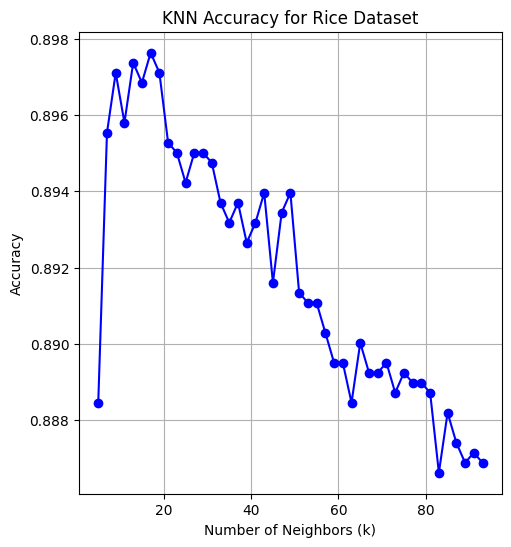

In [25]:
# Step 2: Visualize the Results

# Plot the accuracy curves for Rice dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values_rice, accuracies_rice, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Rice Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)

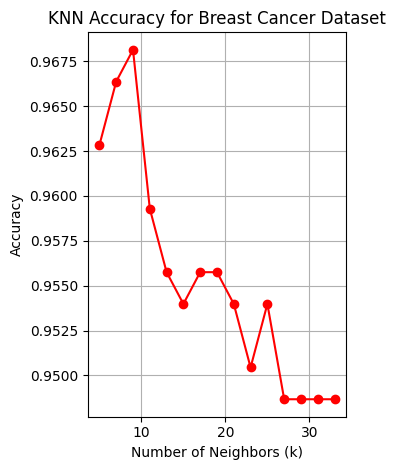

In [46]:
# Plot the accuracy curves for Breast Cancer dataset
plt.subplot(1, 2, 2)
plt.plot(k_values_cancer, accuracies_cancer, marker='o', linestyle='-', color='r')
plt.title('KNN Accuracy for Breast Cancer Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [47]:
# Step 3: Report the best k for each dataset
best_k_rice = k_values_rice[np.argmax(accuracies_rice)]
best_k_cancer = k_values_cancer[np.argmax(accuracies_cancer)]

print(f"Best k for Rice dataset: {best_k_rice}")
print(f"Best k for Breast Cancer dataset: {best_k_cancer}")

Best k for Rice dataset: 17
Best k for Breast Cancer dataset: 9


In [56]:
# Final Evaluation with the Best k for both datasets

# Rice dataset:
accuracy_rice_final = k_fold_cross_validation(X_rice, y_rice, k_folds=5, k_neighbors=best_k_rice, distanceMetric='euclidean')
accuracy_rice_per = accuracy_rice_final*100
accuracy_rice_per = round(accuracy_rice_per, 3)

print(f"Final Accuracy for Rice dataset with k={best_k_rice}: {accuracy_rice_per}")

Final Accuracy for Rice dataset with k=17: 89.764


In [55]:
# Breast Cancer dataset:
accuracy_cancer_final = k_fold_cross_validation(X_bc, y_bc, k_folds=5, k_neighbors=best_k_cancer, distanceMetric='euclidean')
accuracy_cancer_per = accuracy_cancer_final*100
accuracy_cancer_per = round(accuracy_cancer_per, 3)

print(f"Final Accuracy for Breast Cancer dataset with k={best_k_cancer}: {accuracy_cancer_per}")

Final Accuracy for Breast Cancer dataset with k=9: 96.814


## Discussion

- **Rice dataset**: The accuracy initially increases, starting from 88.8% at k = 2-3 and continues to 89.7%, which is the best performance at `k = 17` (accuracy of `89.764%` after which it starts to gradually decline, dropping below 88.8% at k = 95.

**Why is this happening?**

1) Smaller values of k (e.g., 2-3) might lead to overfitting. With fewer neighbors, the model might be too sensitive to small variations in the data, leading to higher accuracy but reduced generalizability. As the value of k increases, the model becomes more robust by considering more neighbors, leading to a more general representation of the data.

2) Fluctuations in accuracy could be due to the nature of the dataset, where the feature relationships are not completely linear or there is noise in the data. As k increases, the model starts to smooth out these fluctuations and reduces overfitting, but this comes at the cost of sensitivity to the data's finer patterns.

3) Optimal k (k = 17) is where the accuracy stabilizes at the highest point. This is likely the value where the model has found a good balance between bias and variance—high enough to generalize well without overfitting, but not too high that it loses important patterns.

4) Decline after k = 17 could happen because at very large k, the model becomes too simplified, essentially averaging out too much information and missing finer distinctions in the data, leading to a decrease in accuracy.

---

- **Breast Cancer**: For the breast cancer dataset, the accuracy initially increases to 96.25% at k = 5, peaking at `96.814%` at `k = 9`. However, after k = 11, there's a noticeable drop to 95.75%, and as k increases further, accuracy decreases and stabilizes around 94% after k = 26.

**Why is this happening?**

1) Smaller k (e.g., 5-9) allows the KNN model to capture finer details in the data. The breast cancer dataset is likely to have strong patterns or clear distinctions between classes (e.g., malignant vs. benign), which smaller k values can pick up. These smaller values of k might capture local variations better and thus result in higher accuracy.

2) Drop at k = 11 and beyond could happen because as the number of neighbors increases, the influence of less relevant data points (potentially noisy or not informative) grows. With larger k values, the decision boundary becomes smoother and might miss important local distinctions in the dataset, leading to a reduction in accuracy.

3) Stabilization at k = 26 is likely a sign that the model has reached a point where the influence of distant neighbors doesn't provide additional useful information, and it stabilizes at a level that reflects the general pattern in the data. After this point, increasing k only averages out the information more, leading to no significant improvement.




---

**Why KNN Behavior Differs Between Datasets:**
- Rice dataset: The relatively high fluctuation and decline in accuracy as k increases may suggest that the dataset has more noise or less clear-cut boundaries between the classes, making it sensitive to the number of neighbors considered.

- Breast cancer dataset: The more stable and high accuracy at smaller k values suggests that this dataset might have more clear, separable classes, which are easier for smaller k to detect. As k increases, the model starts considering less relevant data points, leading to the observed drop.

---

**Confusion matrices** give more insight into the classification performance: the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) can highlight model strengths and weaknesses.
   - In Rice dataset, if the classifier misclassifies many instances of one class, adjusting k may help.
   - In Cancer dataset, we expect a more balanced confusion matrix since it is a binary classification (malignant vs benign).

Confusion Matrix for Rice dataset (k=17):
[[1488  142]
 [ 121 2059]]


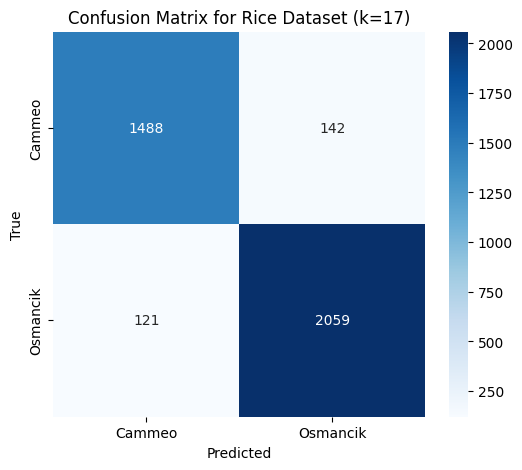

In [ ]:
# Classes in the dataset
classes_for_matrix = np.unique(y_rice)  # Unique class labels
n_classes = len(classes_for_matrix)

# Initialize confusion matrix
cm_rice = np.zeros((n_classes, n_classes), dtype=int)

# Populate the confusion matrix
for true_label, pred_label in zip(y_rice, predictions_rice):
    true_idx = np.where(classes_for_matrix == true_label)[0][0]
    pred_idx = np.where(classes_for_matrix == pred_label)[0][0]
    cm_rice[true_idx, pred_idx] += 1

# Print confusion matrix
print(f"Confusion Matrix for Rice dataset (k={best_k_rice}):")
print(cm_rice)

# Convert to DataFrame for better readability in heatmap
cm_df = pd.DataFrame(cm_rice, index=classes_for_matrix, columns=classes_for_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=["Cammeo", "Osmancik"], yticklabels=["Cammeo", "Osmancik"])
plt.title(f"Confusion Matrix for Rice Dataset (k={best_k_rice})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Confusion Matrix for Breast Cancer dataset (k=9):
[[353   4]
 [ 11 201]]


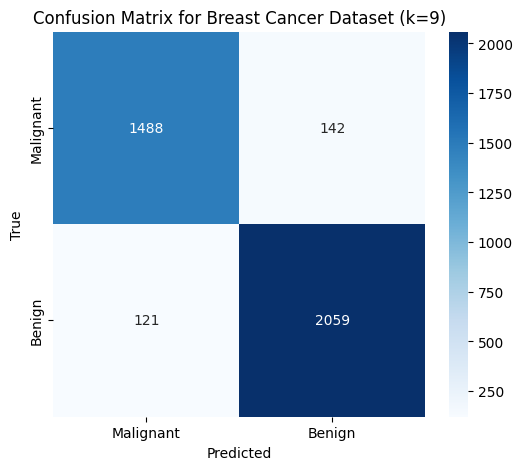

In [ ]:
# Classes in the dataset
classes_for_matrix_bc = np.unique(y_bc)  # Unique class labels
n_classes_bc = len(classes_for_matrix_bc)

# Initialize confusion matrix
cm_bc = np.zeros((n_classes_bc, n_classes_bc), dtype=int)

# Populate the confusion matrix
for true_label, pred_label in zip(y_bc, predictions_cancer):
    true_idx = np.where(classes_for_matrix_bc == true_label)[0][0]
    pred_idx = np.where(classes_for_matrix_bc == pred_label)[0][0]
    cm_bc[true_idx, pred_idx] += 1

# Print confusion matrix
print(f"Confusion Matrix for Breast Cancer dataset (k={best_k_cancer}):")
print(cm_bc)

# Convert to DataFrame for better readability in heatmap
cm_df_bc = pd.DataFrame(cm_bc, index=classes_for_matrix_bc, columns=classes_for_matrix_bc)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.title(f"Confusion Matrix for Breast Cancer Dataset (k={best_k_cancer})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Problem 2.2

## Description
Bayesian Classifiers with Cross-Validation

This notebook implements Bayesian classifiers under different assumptions for the probability density functions (PDFs) of each class.
We evaluate these classifiers using cross-validation on two datasets:
1. Rice_Cammeo_Osmancik.txt
2. Breast_Cancer.csv



## Objectives
- Implement Bayesian classifiers for the assumptions:
  1. Gaussian PDFs with diagonal covariance matrices (equal diagonal elements).
  2. Gaussian PDFs with full covariance matrices.
  3. Naive Bayes with Gaussian Marginals.
  4. Naive Bayes with Parzen Windows (Gaussian Kernel).
  5. Gaussian Mixture Models (GMMs) with BIC for component selection.
- Compare their performance with k-fold cross-validation.

---

## Assumption 1: Gaussian PDFs (Diagonal, Equal Elements)

For this classifier:
- The covariance matrix is assumed to be diagonal, with all diagonal elements equal.
- The mean and shared variance are estimated using Maximum Likelihood from the training set.


### Step 1: Define the Gaussian probability density function - *PDF*

The Gaussian Probability Density Function (PDF) is given by:

$ P(x \mid C_k) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right) $

Where:

- $P(x \mid C_k)$ is the  probability of given class $𝐶$, assuming a Gaussian distribution for class $C_k$

- $\frac{1}{\sqrt{2\pi\sigma^2}}$ is the normalization factor

- $\exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right) $ is describing the likelihood of $x$ given the mean $μ_k$ and variance $σ^2$



### Step 2: Implement the classifier

---

## Assumption 2: Gaussian PDFs (Full Covariance)



For this classifier:
- The covariance matrix is fully populated (non-diagonal).
- Parameters (mean and covariance matrix) are estimated using Maximum Likelihood.

### Step 1: Define the multivariete Gaussian probability density function

The multivariate Gaussian PDF is given by:

$
P(x|\mu, \Sigma) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}}
\exp\left(-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$


Where:

- $x$ is the feature vector.

- $μ$ is the mean vector.

- $Σ$ is the covariance matrix.

- $d$ is the number of dimensions (features)

### Step 2: Implement the classifier

---

## Assumption 3:  Naive Bayes with Gaussian Marginals

In this classifier:
- Features are assumed to be independent.
- Each feature is modeled using a Gaussian distribution.

$
P(x \mid C_k) = \prod_{j=1}^d P(x_j \mid C_k)
$

Where:

- $P(x \mid C_k)$ is the probability of $x$ given class $𝐶𝑘$.
- $\prod_{j=1}^d $ represents the product from $𝑗=1$ to $𝑑$, assuming independence between features.
- $P(x_j \mid C_k)$ is the probability of feature $x_j$ given class $C_k$.

---

## Assumption 4:  Naive Bayes with Parzen Windows

For this classifier:
- Features are assumed to be independent (Naive Bayes assumption).
- Each feature's marginal PDF is estimated using 1D Parzen Windows with Gaussian kernels.
- The kernel width $( h )$ is chosen as $( h = \frac{1}{\sqrt{N}} $), where $( N )$ is the number of training samples.

### Step 1: Utility functions

1) Define a Gaussian kernel for each feature:

$K(x) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right)$

2) Estimate the pdf using Parzen windows:

$P(x_j \mid C_k) = \frac{1}{N_h} \sum_{i=1}^{N_h} K\left( x_j - x_{ij} \right)$

Where:

- $P(x_j \mid C_k)$ is the probabiblity of feature $𝑥_𝑗$ given class $𝐶_𝑘$.
- $\frac{1}{N_h}$ is a normalization constant, where $𝑁_ℎ$ represents the number of samples or instances for class $𝐶_𝑘$.
- $\sum_{i=1}^{N_h}$ is the summation over the samples.
- $K\left( x_j - x_{ij} \right)$  is a kernel function $𝐾4$, applied to the difference between the feature $𝑥_𝑗$ and the corresponding sample $𝑥_{𝑖j}$.


### Step 2: Implement the classifier

---

## Assumption 5: Gaussian Mixture Models with BIC

For this classifier:
- Each class's PDF is modeled using a Gaussian Mixture Model (GMM).
- The Expectation-Maximization (EM) algorithm is used to estimate the parameters of the GMM.
- The optimal number of components is selected using the Bayesian Information Criterion (BIC).

### Step 1: Define a function for the Expectation - Maximization algorithm

E-step:

$r_{ik} = \frac{\sum_{j=1}^K \pi_j N(x_i \mid \mu_j, \Sigma_j)}{\pi_k N(x_i \mid \mu_k, \Sigma_k)}$

- $r_{ik}$ is the responsibility of cluster $𝑘$ for data point $𝑥_i$.

- $ \sum_{j=1}^K $ is the summation over all clusters.

- $pi_j$ is the prior probability (or weight) for cluster $j$.

- $N(x_i \mid \mu_j, \Sigma_j)$ is the normal distribution for cluster $𝑗$ with mean $𝜇_j$ and covariance $Σ_j$.

- $pi_k$ and  $N(x_i \mid \mu_k, \Sigma_k)$ are the prior and normal distribution for cluster $𝑘$.



M-step:

$
\mu_k = \frac{\sum_{i} r_{ik} x_i}{\sum_{i} r_{ik}}
$

$Σ_k = \frac{\sum_{i} r_{ik} (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i} r_{ik}}
$

$
\pi_k = \frac{N_k}{N} = \frac{\sum_{i} r_{ik}}{N}
$

- For $μ_k$: The mean of cluster $𝑘$ is a weighted average of the data points $𝑥_𝑖$, where $𝑟_{𝑖𝑘}$ is the responsibility of cluster $k$ for data point $𝑥_𝑖$.

- For $Σ_k$ : The covariance matrix $Σ_k$ is a weighted sum of the outer products of $(𝑥
_i - μ_k)$, the deviation from the mean of cluster $k$.

- For $π_k$: The prior probability $π_k$ of cluster $k$ is the fraction of the total number of data points $N$ assigned to cluster $k$, computed by summing the responsibilities $r_{ik}$.  

### Step 2: Use the Bayesian Information Criterion (BIC) and implement the classifier

BIC criterion:

$\text{BIC} = -2 \log L + p \log N$

- $log L$: Log-likelihood of the model given the data.
- $p$: Number of parameters in the model.
- $N$: Number of data points.

---

**PDFModels**: A class for handling the computation of probability density functions (PDFs) and Gaussian Mixture Models (GMM) using the Expectation-Maximization (EM) algorithm.

In [ ]:
class PDFModels:
    """
    A class to handle probability density functions and Gaussian Mixture Models.
    """
    def multivariate_gaussian_pdf(self, X, mean, covariance,  reg=1e-6):
        """
        Compute the multivariate Gaussian probability density function.

        Parameters:
            X (ndarray): Data samples (n_samples, n_features).
            mean (ndarray): Mean vector (n_features,).
            covariance (ndarray): Covariance matrix (n_features, n_features).
            reg (float): Regularization term to prevent singular matrix.

        Returns:
            ndarray: Probability densities for each sample in X.
        """
        n_samples, n_features = X.shape
        diff = X - mean

        # Add regularization to the covariance matrix
        covariance += reg * np.eye(covariance.shape[0])

        # Compute determinant and inverse of the covariance matrix
        det_cov = np.linalg.det(covariance)
        if det_cov == 0:
            raise ValueError("Covariance matrix is singular!")
        inv_cov = np.linalg.inv(covariance)

        # Normalization constant
        norm_const = 1 / (np.sqrt((2 * np.pi) ** n_features * det_cov))

        # Exponent term
        exp_term = np.einsum('ij,jk,ik->i', diff, inv_cov, diff)
        return norm_const * np.exp(-0.5 * exp_term)

    def gaussian_kernel(self, u):
        """
        Gaussian kernel function.

        Parameters:
            u (float or ndarray): Input (standardized distance).

        Returns:
            float or ndarray: Kernel value(s).
        """
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u ** 2)

    def parzen_window_density(self, X_train, x, h):
        """
        Parzen Window density estimation using Gaussian kernel.

        Parameters:
            X_train (ndarray): Training samples (n_samples, n_features).
            x (ndarray): Point to estimate density for (n_features,).
            h (float): Bandwidth parameter.

        Returns:
            float: Estimated density at x.
        """
        n_samples, n_features = X_train.shape
        x = x.reshape(1, -1)  # Ensure x is a 2D array

        # Compute scaled distances for all points in X_train
        scaled_distances = (X_train - x) / h

        # Apply Gaussian kernel to each scaled distance
        kernel_values = self.gaussian_kernel(scaled_distances)

        # Compute density
        density = np.prod(kernel_values, axis=1).mean() / (h ** n_features)
        return density

    def gmm_em(self, X, k, max_iter=100, tol=1e-4):
        """
        Gaussian Mixture Model (GMM) using Expectation-Maximization (EM).

        Parameters:
            X (ndarray): Data samples (n_samples, n_features).
            k (int): Number of components (Gaussians).
            max_iter (int): Maximum number of iterations.
            tol (float): Convergence tolerance for log-likelihood.

        Returns:
            tuple: (weights, means, covariances, log_likelihoods)
        """
        n_samples, n_features = X.shape

        # Initialize parameters
        weights = np.ones(k) / k  # Uniform weights
        means = X[np.random.choice(n_samples, k, replace=False)]  # Random initial means
        covariances = np.array([np.eye(n_features)] * k)  # Identity covariance for all components
        log_likelihoods = []

        for _ in range(max_iter):
            # E-step: Compute responsibilities
            responsibilities = np.zeros((n_samples, k))
            for j in range(k):
                responsibilities[:, j] = weights[j] * self.multivariate_gaussian_pdf(X, means[j], covariances[j])
            responsibilities /= responsibilities.sum(axis=1, keepdims=True)

            # M-step: Update weights, means, covariances
            N_k = responsibilities.sum(axis=0)  # Effective number of points per cluster
            weights = N_k / n_samples
            means = np.dot(responsibilities.T, X) / N_k[:, None]
            for j in range(k):
                diff = X - means[j]
                covariances[j] = (responsibilities[:, j][:, None] * diff).T @ diff / N_k[j]

            # Compute log-likelihood
            log_likelihood = np.sum(np.log(np.sum([
                weights[j] * self.multivariate_gaussian_pdf(X, means[j], covariances[j])
                for j in range(k)
            ], axis=0)))
            log_likelihoods.append(log_likelihood)

            # Check for convergence
            if len(log_likelihoods) > 1 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
                break

        return weights, means, covariances, log_likelihoods

**BayesClassifier**: A class for implementing Bayesian classification logic. This will handle cross-validation, train-test splits, and evaluate performance for all the assumptions.

In [ ]:
class BayesClassifier:
    """
    A class to implement Bayesian classification using different assumptions.
    """
    def __init__(self):
        self.pdf_models = PDFModels()  # Instantiate the PDFModels class

    def assumption_1(self, X_train, y_train, X_test):
        """
        Assumption 1: Multivariate Gaussian PDFs with diagonal covariance.

        Parameters:
        X_train (ndarray): Training feature data.
        y_train (ndarray): Training labels.
        X_test (ndarray): Test feature data.

    Returns:
        ndarray: Predicted class labels for X_test.
        """
        classes = np.unique(y_train)
        class_params = {}  # Store mean and covariance for each class

        for cls in classes:
            X_cls = X_train[y_train == cls]
            mean = np.mean(X_cls, axis=0)
            variance = np.var(X_cls, axis=0)
            covariance = np.diag(variance)  # Diagonal covariance matrix
            class_params[cls] = (mean, covariance)

        # Predict for test samples
        predictions = []
        for x in X_test:
            posteriors = []
            for cls, (mean, covariance) in class_params.items():
                likelihood = self.pdf_models.multivariate_gaussian_pdf(x.reshape(1, -1), mean, covariance)
                prior = 1 / len(classes)  # Uniform prior
                posterior = likelihood * prior
                posteriors.append(posterior)
            predictions.append(classes[np.argmax(posteriors)])

        return np.array(predictions)

    def assumption_2(self, X_train, y_train, X_test):
        """
        Assumption 2: Multivariate Gaussian PDFs with full covariance matrices.
        """
        classes = np.unique(y_train)
        class_params = {}

        for cls in classes:
            X_cls = X_train[y_train == cls]
            mean = np.mean(X_cls, axis=0)
            covariance = np.cov(X_cls, rowvar=False)  # Full covariance matrix
            class_params[cls] = (mean, covariance)

        # Predict for test samples
        predictions = []
        for x in X_test:
            posteriors = []
            for cls, (mean, covariance) in class_params.items():
                likelihood = self.pdf_models.multivariate_gaussian_pdf(x.reshape(1, -1), mean, covariance)
                prior = 1 / len(classes)
                posterior = likelihood * prior
                posteriors.append(posterior)
            predictions.append(classes[np.argmax(posteriors)])

        return np.array(predictions)

    def assumption_3(self, X_train, y_train, X_test):
        """
        Assumption 3: Naïve Bayes with Gaussian marginals (features are independent).

        Parameters:
        X_train (ndarray): Training feature data.
        y_train (ndarray): Training labels.
        X_test (ndarray): Test feature data.
        h (float): Kernel width. Defaults to 1/sqrt(N).

    Returns:
        ndarray: Predicted class labels for X_test.
        """
        classes = np.unique(y_train)
        class_params = {}

        for cls in classes:
            X_cls = X_train[y_train == cls]
            mean = np.mean(X_cls, axis=0)
            variance = np.var(X_cls, axis=0)
            class_params[cls] = (mean, variance)

        # Predict for test samples
        predictions = []
        for x in X_test:
            posteriors = []
            for cls, (mean, variance) in class_params.items():
                likelihood = np.prod(  # Product of Gaussian PDFs for each feature
                    (1 / np.sqrt(2 * np.pi * variance)) *
                    np.exp(-0.5 * ((x - mean) ** 2) / variance)
                )
                prior = 1 / len(classes)  # Uniform prior
                posterior = likelihood * prior
                posteriors.append(posterior)
            predictions.append(classes[np.argmax(posteriors)])

        return np.array(predictions)

    def assumption_4(self, X_train, y_train, X_test, h=None):
        """
        Assumption 4: Naïve Bayes with Parzen window estimation for PDFs.

        Parameters:
        X_train (ndarray): Training feature data.
        y_train (ndarray): Training labels.
        X_test (ndarray): Test feature data.
        h (float): Bandwidth for Parzen window (default: 1 / sqrt(n_samples)).

        Returns:
        ndarray: Predicted class labels for X_test.
        """
        h = h or (1 / np.sqrt(len(X_train)))  # Default bandwidth
        classes = np.unique(y_train)

        # Predict for test samples
        predictions = []
        for x in X_test:
            posteriors = []
            for cls in classes:
                # Extract samples for this class
                X_cls = X_train[y_train == cls]

                # Estimate density using Parzen window
                likelihood = self.pdf_models.parzen_window_density(X_cls, x, h)

                # Uniform prior
                prior = 1 / len(classes)

                # Compute posterior probability
                posterior = likelihood * prior
                posteriors.append(posterior)

            # Assign class with the highest posterior
            predictions.append(classes[np.argmax(posteriors)])

        return np.array(predictions)

    def assumption_5(self, X_train, y_train, X_test, max_components=5):
        """
        Assumption 5: GMMs with Bayesian Information Criterion (BIC) for model selection.
        """
        classes = np.unique(y_train)
        class_models = {}

        for cls in classes:
            X_cls = X_train[y_train == cls]
            best_bic = float('inf')
            best_model = None

            for k in range(1, max_components + 1):
                weights, means, covariances, log_likelihoods = self.pdf_models.gmm_em(X_cls, k)
                n_features = X_cls.shape[1]
                n_params = k * (n_features + n_features * (n_features + 1) / 2 + 1)
                log_likelihood = log_likelihoods[-1]
                bic = -2 * log_likelihood + n_params * np.log(len(X_cls))

                if bic < best_bic:
                    best_bic = bic
                    best_model = (weights, means, covariances)

            class_models[cls] = best_model

        # Predict for test samples
        predictions = []
        for x in X_test:
            posteriors = []
            for cls, (weights, means, covariances) in class_models.items():
                likelihood = np.sum([
                    weights[j] * self.pdf_models.multivariate_gaussian_pdf(x.reshape(1, -1), means[j], covariances[j])
                    for j in range(len(weights))
                ])
                prior = 1 / len(classes)
                posterior = likelihood * prior
                posteriors.append(posterior)
            predictions.append(classes[np.argmax(posteriors)])

        return np.array(predictions)

## Cross Validation
We evaluate all classifiers using 5-fold cross-validation.

In [ ]:
def k_fold_cross_validation_bayes(X, y, k_folds, classifier_func, **kwargs):
    """
    K-Fold Cross-Validation for Bayesian classifiers.

    Parameters:
        X (ndarray): Feature data.
        y (ndarray): Target labels.
        k_folds (int): Number of folds.
        classifier_func (function): Bayesian classifier function.
        **kwargs: Additional arguments for the classifier function.

    Returns:
        float: Mean accuracy across folds.
    """
    fold_size = len(X) // k_folds
    accuracies = []

    for fold in range(k_folds):
        # Split data into training and validation
        start = fold * fold_size
        end = start + fold_size
        X_val, y_val = X[start:end], y[start:end]
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)

        # Predict using the Bayesian classifier function
        y_pred = classifier_func(X_train, y_train, X_val, **kwargs)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y_val)
        accuracies.append(accuracy)

    return np.mean(accuracies)

---

## Results

In [ ]:
# Instantiate the BayesClassifier
classifier = BayesClassifier()

# Define the datasets
# Replace `X_rice`, `y_rice`, `X_bc`, `y_bc` with your actual datasets
k_folds = 5

# Evaluate each assumption on the rice and BC datasets
print("Evaluating classifiers on the rice dataset:")
acc_rice_a = k_fold_cross_validation_bayes(X_rice, y_rice, k_folds, classifier.assumption_1)
print(f"Assumption 1 (Diagonal Covariance) Accuracy: {acc_rice_a:.2f}")

acc_rice_b = k_fold_cross_validation_bayes(X_rice, y_rice, k_folds, classifier.assumption_2)
print(f"Assumption 2 (Full Covariance) Accuracy: {acc_rice_b:.2f}")

acc_rice_c = k_fold_cross_validation_bayes(X_rice, y_rice, k_folds, classifier.assumption_3)
print(f"Assumption 3 (Naive Bayes with Gaussian Marginals) Accuracy: {acc_rice_c:.2f}")

acc_rice_d = k_fold_cross_validation_bayes(
    X_rice,
    y_rice,
    k_folds,
    lambda X_train, y_train, X_test: classifier.assumption_4(X_train, y_train, X_test, h=1/np.sqrt(len(X_train)))
)
print(f"Assumption 4 (Naive Bayes with Parzen Windows) Accuracy: {acc_rice_d:.2f}")

acc_rice_e = k_fold_cross_validation_bayes(X_rice, y_rice, k_folds, classifier.assumption_5)
print(f"Assumption 5 (GMM with BIC) Accuracy: {acc_rice_e:.2f}")

print("\nEvaluating classifiers on the Breast Cancer dataset:")
acc_bc_a = k_fold_cross_validation_bayes(X_bc, y_bc, k_folds, classifier.assumption_1)
print(f"Assumption 1 (Diagonal Covariance) Accuracy: {acc_bc_a:.2f}")

acc_bc_b = k_fold_cross_validation_bayes(X_bc, y_bc, k_folds, classifier.assumption_2)
print(f"Assumption 2 (Full Covariance) Accuracy: {acc_bc_b:.2f}")

acc_bc_c = k_fold_cross_validation_bayes(X_bc, y_bc, k_folds, classifier.assumption_3)
print(f"Assumption 3 (Naive Bayes with Gaussian Marginals) Accuracy: {acc_bc_c:.2f}")

acc_bc_d = k_fold_cross_validation_bayes(
    X_bc,
    y_bc,
    k_folds,
    lambda X_train, y_train, X_test: classifier.assumption_4(X_train, y_train, X_test, h=1/np.sqrt(len(X_train)))
)
print(f"Assumption 4 (Naive Bayes with Parzen Windows) Accuracy: {acc_bc_d:.2f}")

acc_bc_e = k_fold_cross_validation_bayes(X_bc, y_bc, k_folds, classifier.assumption_5)
print(f"Assumption 5 (GMM with BIC) Accuracy: {acc_bc_e:.2f}")


Evaluating classifiers on the rice dataset:
Assumption 1 (Diagonal Covariance) Accuracy: 0.92
Assumption 2 (Full Covariance) Accuracy: 0.92
Assumption 3 (Naive Bayes with Gaussian Marginals) Accuracy: 0.92
Assumption 4 (Naive Bayes with Parzen Windows) Accuracy: 0.89
Assumption 5 (GMM with BIC) Accuracy: 0.92

Evaluating classifiers on the Breast Cancer dataset:
Assumption 1 (Diagonal Covariance) Accuracy: 0.93
Assumption 2 (Full Covariance) Accuracy: 0.96
Assumption 3 (Naive Bayes with Gaussian Marginals) Accuracy: 0.93
Assumption 4 (Naive Bayes with Parzen Windows) Accuracy: 0.95
Assumption 5 (GMM with BIC) Accuracy: 0.96


## Discussion

- Rice Dataset : The high correlations between features in the Rice dataset, along with the lack of extreme outliers or variation in feature scales, likely contribute to the relatively similar performance across most models. Simple models like diagonal covariance or Naive Bayes perform well because they capture the key relationships in the data without needing to model more complex dependencies.

- Breast Cancer Dataset: The dataset exhibits both high feature correlations and some extreme values (potential outliers), which influence the performance of the classifiers. The full covariance model performs the best because it can capture the complex feature dependencies. GMM with BIC and Naive Bayes with Parzen Windows also perform well, likely due to their flexibility in modeling non-linear relationships and handling outliers, but full covariance provides the most effective solution due to the feature interdependencies in the data.

** kNN vs Bayes: **

Naive Bayes assumes feature independence and may struggle if this assumption doesn't hold. In the case of the rice dataset, where features might be correlated, Naive Bayes might not perform as well as KNN. KNN, by considering multiple neighbors, can inherently handle some amount of correlation better by averaging the influence of neighboring points.

On the other hand, for the breast cancer dataset, where the features may be more Gaussian or closer to the assumptions of Naive Bayes, the algorithm could perform better than KNN for certain values of k. However, KNN's performance may still be more sensitive to the data, and the choice of k could dramatically influence accuracy.